In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm

np.random.seed(1337)
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

# Data

In [195]:
# load the training data from the respective filepaths
train_features_filepath = 'data/train_features.csv'
test_features_filepath = 'data/test_features.csv'
train_labels_filepath = 'data/train_labels.csv'

# create the dataframes
train_features_df = pd.read_csv(train_features_filepath, float_precision="round_trip")
test_features_df = pd.read_csv(test_features_filepath, float_precision="round_trip")
train_labels_df = pd.read_csv(train_labels_filepath, float_precision="round_trip")
print("Train shape:", train_features_df.shape, "| Train label shape:", train_labels_df.shape, "| Test shape:", test_features_df.shape)
display(train_features_df.head(40))
display(train_labels_df.head(40))
display(test_features_df.head(30))

display(train_features_df.describe())
display(train_labels_df.describe())

Train shape: (227940, 37) | Train label shape: (18995, 16) | Test shape: (151968, 37)


pid  Time   Age  EtCO2   PTT   BUN  Lactate  Temp   Hgb  HCO3  \
0      1     3  34.0    NaN   NaN  12.0      NaN  36.0   8.7  24.0   
1      1     4  34.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
2      1     5  34.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
3      1     6  34.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
4      1     7  34.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
5      1     8  34.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
6      1     9  34.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
7      1    10  34.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
8      1    11  34.0    NaN   NaN  12.0      NaN   NaN   8.5  26.0   
9      1    12  34.0    NaN   NaN  12.0      NaN  38.0   8.5  26.0   
10     1    13  34.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
11     1    14  34.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
12    10     1  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
13    10     2  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
14    10     3  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
15    10     4  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
16    10     5  71.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
17    10     6  71.0    NaN  27.8  12.0      NaN   NaN  14.6   NaN   
18    10     7  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
19    10     8  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
20    10     9  71.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
21    10    10  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
22    10    11  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
23    10    12  71.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
24   100     2  68.0    NaN   NaN   NaN      NaN  35.0   NaN   NaN   
25   100     3  68.0    NaN  20.9  21.0      NaN   NaN  12.5  27.0   
26   100     4  68.0    NaN   NaN  21.0      NaN  36.0  12.5  27.0   
27   100     5  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
28   100     6  68.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
29   100     7  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
30   100     8  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
31   100     9  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
32   100    10  68.0    NaN   NaN   NaN      NaN  38.0   NaN   NaN   
33   100    11  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
34   100    12  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
35   100    13  68.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
36  1000     1  79.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
37  1000     2  79.0   26.0   NaN   NaN      NaN  36.0   NaN   NaN   
38  1000     3  79.0   29.5   NaN   NaN     4.05  36.0   NaN   NaN   
39  1000     4  79.0   30.0   NaN   NaN      NaN  36.0   NaN   NaN   

    BaseExcess  RRate  Fibrinogen  Phosphate   WBC  Creatinine  PaCO2   AST  \
0         -2.0   16.0         NaN        NaN   6.3         NaN   45.0   NaN   
1         -2.0   16.0         NaN        NaN   NaN         NaN    NaN   NaN   
2          0.0   18.0         NaN        NaN   NaN         NaN   43.0   NaN   
3          0.0   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
4          NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
5          NaN   16.0         NaN        NaN   NaN         NaN    NaN   NaN   
6          NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
7          NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
8          NaN   12.0         NaN        4.6   4.7        0.50    NaN   NaN   
9          0.0   18.0         NaN        NaN   4.7         NaN   42.0   NaN   
10         0.0   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
11         NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
12         NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
13         NaN   23.0       

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0       1               1.0               0.0        0.0                 0.0   
1      10               0.0               0.0        0.0                 0.0   
2     100               1.0               0.0        0.0                 0.0   
3    1000               0.0               0.0        0.0                 0.0   
4   10000               0.0               0.0        0.0                 0.0   
5   10002               0.0               0.0        0.0                 0.0   
6   10006               0.0               0.0        0.0                 0.0   
7   10007               0.0               0.0        1.0                 1.0   
8   10009               1.0               1.0        0.0                 0.0   
9    1001               1.0               0.0        0.0                 0.0   
10  10010               0.0               0.0        0.0                 0.0   
11  10012               0.0               0.0        1.0                 1.0   
12  10013               1.0               0.0        1.0                 1.0   
13  10014               0.0               0.0        0.0                 0.0   
14  10015               0.0               0.0        0.0                 0.0   
15  10016               1.0               1.0        0.0                 0.0   
16   1002               0.0               0.0        0.0                 0.0   
17  10020               0.0               0.0        1.0                 1.0   
18  10021               0.0               0.0        1.0                 1.0   
19  10022               0.0               0.0        0.0                 0.0   
20  10023               0.0               0.0        0.0                 0.0   
21  10024               1.0               1.0        1.0                 1.0   
22  10026               1.0               1.0        0.0                 0.0   
23  10027               0.0               0.0        0.0                 0.0   
24  10029               0.0               0.0        0.0                 0.0   
25  10030               0.0               0.0        0.0                 0.0   
26  10031               0.0               0.0        0.0                 0.0   
27  10034               1.0               0.0        1.0                 1.0   
28  10035               0.0               0.0        0.0                 0.0   
29  10036               0.0               0.0        0.0                 0.0   
30  10037               0.0               0.0        0.0                 0.0   
31  10038               1.0               1.0        1.0                 1.0   
32  10040               1.0               1.0        1.0                 1.0   
33  10044               1.0               0.0        0.0                 0.0   
34  10045               1.0               0.0        0.0                 0.0   
35  10048               1.0               0.0        0.0                 0.0   
36  10049               0.0               0.0        0.0                 0.0   
37  10050               0.0               0.0        0.0                 0.0   
38  10052               1.0               0.0        0.0                 0.0   
39  10053               0.0               0.0        0.0                 0.0   

    LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                     0.0            1.0              0.0         0.0   
1                     0.0            0.0              0.0         0.0   
2                     0.0            1.0              0.0         0.0   
3                     0.0            1.0              0.0         1.0   
4                     0.0            0.0              0.0         0.0   
5                     0.0            0.0              0.0         0.0   
6                     0.0            0.0              0.0         0.0   
7                     1.0            0.0              0.0         0.0   
8                     0.0            1.0              0.0         1.

pid  Time   Age  EtCO2   PTT   BUN  Lactate  Temp   Hgb  HCO3  \
0       0     1  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
1       0     2  39.0    NaN  44.2  17.0      NaN  36.0  10.2  13.0   
2       0     3  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
3       0     4  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
4       0     5  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
5       0     6  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
6       0     7  39.0    NaN  38.5  20.0      NaN   NaN   9.1  16.0   
7       0     8  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
8       0     9  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
9       0    10  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
10      0    11  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
11      0    12  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
12  10001     1  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
13  10001     2  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
14  10001     3  62.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
15  10001     4  62.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
16  10001     5  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
17  10001     6  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
18  10001     7  62.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
19  10001     8  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
20  10001     9  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
21  10001    10  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
22  10001    11  62.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
23  10001    12  62.0    NaN   NaN   NaN      NaN  38.0   NaN   NaN   
24  10003     1  72.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN   
25  10003     2  72.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN   
26  10003     3  72.0    NaN   NaN   NaN     2.00  37.0   NaN   NaN   
27  10003     4  72.0    NaN   NaN   NaN     2.02  37.0   NaN   NaN   
28  10003     5  72.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   
29  10003     6  72.0    NaN   NaN   NaN      NaN  37.0   NaN   NaN   

    BaseExcess  RRate  Fibrinogen  Phosphate   WBC  Creatinine  PaCO2   AST  \
0          NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
1          NaN    NaN       147.0        6.0  17.5         2.2    NaN  32.0   
2         -9.0   13.0         NaN        NaN   NaN         NaN   26.0   NaN   
3          NaN   12.0         NaN        NaN   NaN         NaN    NaN   NaN   
4          NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
5          NaN   10.0         NaN        NaN   NaN         NaN    NaN   NaN   
6          NaN   12.0         NaN        4.8  18.5         2.4    NaN  31.0   
7         -4.0   12.0         NaN        NaN   NaN         NaN   30.0   NaN   
8          NaN   12.0         NaN        NaN   NaN         NaN    NaN   NaN   
9          NaN   11.0         NaN        NaN   NaN         NaN    NaN   NaN   
10         NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
11         NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
12         NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
13         NaN   17.0         NaN        NaN   NaN         NaN    NaN   NaN   
14         NaN   17.0         NaN        NaN   NaN         NaN    NaN   NaN   
15         NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
16         NaN   18.0         NaN        NaN   NaN         NaN    NaN   NaN   
17         NaN   15.0         NaN        NaN   NaN         NaN    NaN   NaN   
18         NaN   15.0         NaN        NaN   NaN         NaN    NaN   NaN   
19         NaN   16.0         NaN        NaN   NaN         NaN    NaN   NaN   
20         NaN    NaN         NaN        NaN   NaN         NaN    NaN   NaN   
21         NaN   18.0         NaN        NaN   NaN         NaN    

pid           Time            Age        EtCO2           PTT  \
count  227940.000000  227940.000000  227940.000000  9783.000000  10299.000000   
mean    15788.831219       7.014399      62.073809    32.883114     40.091310   
std      9151.896286       4.716103      16.451854     7.802065     26.034961   
min         1.000000       1.000000      15.000000    10.000000     12.500000   
25%      7879.000000       4.000000      52.000000    28.500000     27.800000   
50%     15726.000000       7.000000      64.000000    33.000000     32.200000   
75%     23725.000000      10.000000      74.000000    38.000000     40.600000   
max     31658.000000     315.000000     100.000000   100.000000    250.000000   

                BUN       Lactate          Temp           Hgb         HCO3  \
count  20105.000000  10756.000000  81115.000000  22295.000000  12559.00000   
mean      23.192664      2.859716     36.852136     10.628208     23.48810   
std       20.024289      2.428368      0.875152      2.074859      4.40378   
min        1.000000      0.200000     21.000000      3.300000      0.00000   
25%       12.000000      1.400000     36.000000      9.200000     21.00000   
50%       17.000000      2.100000     37.000000     10.500000     23.90000   
75%       27.000000      3.400000     37.000000     12.000000     26.00000   
max      268.000000     31.000000     42.000000     23.800000     50.00000   

         BaseExcess          RRate   Fibrinogen     Phosphate           WBC  \
count  19887.000000  187785.000000  2493.000000  11590.000000  19083.000000   
mean      -1.239284      18.154043   262.496911      3.612519     11.738649   
std        4.192677       5.037031   133.020910      1.384462     10.088872   
min      -29.000000       1.000000    34.000000      0.200000      0.100000   
25%       -3.000000      15.000000   177.000000      2.800000      7.600000   
50%       -1.000000      18.000000   233.000000      3.400000     10.400000   
75%        0.000000      21.000000   316.000000      4.200000     14.000000   
max      100.000000      97.000000  1179.000000     16.400000    440.000000   

         Creatinine         PaCO2          AST          FiO2     Platelets  \
count  17792.000000  21043.000000  5761.000000  26602.000000  18035.000000   
mean       1.495777     41.115696   193.444888      0.701666    204.666426   
std        1.898112      8.929873   682.836708     24.522126    104.156406   
min        0.100000     10.000000     5.000000      0.000000      2.000000   
25%        0.700000     36.000000    21.000000      0.400000    137.000000   
50%        0.900000     40.000000    36.000000      0.500000    189.000000   
75%        1.380000     45.000000    84.000000      0.600000    251.000000   
max       41.900000    100.000000  9961.000000   4000.000000   2322.000000   

               SaO2       Glucose           ABPm     Magnesium     Potassium  \
count  13014.000000  47036.000000  195889.000000  17523.000000  28393.000000   
mean      93.010527    142.169407      82.117276      2.004149      4.152729   
std       10.887271     56.894530      16.471871      0.437286      0.670168   
min       24.000000     15.000000      20.000000      0.500000      1.300000   
25%       95.000000    108.000000      71.000000      1.700000      3.700000   
50%       97.000000    130.000000      80.000000      2.000000      4.100000   
75%       98.000000    160.000000      91.000000      2.200000      4.500000   
max      100.000000    952.000000     300.000000      9.600000     10.750000   

                ABPd       Calcium  Alkalinephos           SpO2  \
count  152418.000000  17830.000000   5708.000000  195192.000000   
mean       64.014711      7.161149     97.796163      97.663449   
std        13.920097      2.812067    122.773379       2.786186   
min        20.000000      1.000000     12.000000      20.000000   
25%        54.250000      7.300000     53.000000      96.000000   
50%        62.000000      8.200000     72.0000

pid  LABEL_BaseExcess  LABEL_Fibrinogen     LABEL_AST  \
count  18995.000000      18995.000000      18995.000000  18995.000000   
mean   15788.831219          0.268281          0.073704      0.239747   
std     9152.117122          0.443076          0.261295      0.426940   
min        1.000000          0.000000          0.000000      0.000000   
25%     7879.500000          0.000000          0.000000      0.000000   
50%    15726.000000          0.000000          0.000000      0.000000   
75%    23724.500000          1.000000          0.000000      0.000000   
max    31658.000000          1.000000          1.000000      1.000000   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
count         18995.00000           18995.000000   18995.000000   
mean              0.23622               0.240590       0.200211   
std               0.42477               0.427453       0.400168   
min               0.00000               0.000000       0.000000   
25%               0.00000               0.000000       0.000000   
50%               0.00000               0.000000       0.000000   
75%               0.00000               0.000000       0.000000   
max               1.00000               1.000000       1.000000   

       LABEL_TroponinI    LABEL_SaO2  LABEL_Bilirubin_direct   LABEL_EtCO2  \
count     18995.000000  18995.000000            18995.000000  18995.000000   
mean          0.099763      0.233693                0.033904      0.066017   
std           0.299692      0.423190                0.180986      0.248319   
min           0.000000      0.000000                0.000000      0.000000   
25%           0.000000      0.000000                0.000000      0.000000   
50%           0.000000      0.000000                0.000000      0.000000   
75%           0.000000      0.000000                0.000000      0.000000   
max           1.000000      1.000000                1.000000      1.000000   

       LABEL_Sepsis   LABEL_RRate    LABEL_ABPm    LABEL_SpO2  LABEL_Heartrate  
count  18995.000000  18995.000000  18995.000000  18995.000000     18995.000000  
mean       0.057278     18.795960     82.511171     96.947311        84.119716  
std        0.232380      3.511241     12.745110      2.110957        14.718396  
min        0.000000      1.000000     26.000000     27.000000        30.200000  
25%        0.000000     16.550000     73.200000     95.900000        73.700000  
50%        0.000000     18.400000     81.000000     97.100000        83.400000  
75%        0.000000     20.600000     90.200000     98.300000        93.600000  
max        1.000000     41.100000    147.100000    100.000000       155.600000

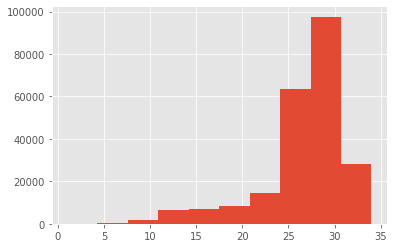

'Number of instances: 227940'

In [61]:
import matplotlib.pyplot as plt

# Plots the number of rows that have 'NaN' values
plt.style.use('ggplot')
plt.hist(train_features_df.isnull().sum(axis=1), bins=10)
plt.show()

display("Number of instances: {}".format(train_features_df.shape[0]))

# KNN Imputer

In [148]:
from sklearn.impute import KNNImputer
import multiprocessing

# Train set for imputing, contains labels
impute_train_fit_set = train_features_df.merge(train_labels_df, on='pid', how='left')

# Test set for imputing, contains labels with NaN values
impute_test_labels = pd.DataFrame(np.nan, index=train_labels_df.index, columns=train_labels_df.columns)
impute_test_set = test_features_df.merge(impute_test_labels, on='pid', how='left')

#imputer = KNNImputer(n_neighbors=4)
#imputer.fit(impute_train_fit_set.iloc[:, 2:])

def impute_df_knn(df, imputer, save_dest):
    print("[Impute] set has NaN values: {}".format(train_features_df.isnull().values.any()))
    print("[Impute] Starting KNN Imputation")
    
    # For each patient measurement column, fill the ones that are completely 'NaN'
    """measurement_cols = train_features_df.columns[2:]
    print(measurement_cols)
    display(df.head(30))
    for pid in tqdm(df['pid'].unique()):
        patient_rows = df.loc[df['pid'] == pid]
        for column in measurement_cols:
            # If all column values are 'NaN'
            if patient_rows[column].isnull().all():
                patient_rows[column].fillna(-10)
        
        df.loc[df['pid'] == pid] = patient_rows"""
    
    # Impute with KNNImputer
    nr_chunks = 1000
    for train_chunk in tqdm(np.array_split(df.iloc[:, 2:], nr_chunks)):
        train_chunk_filled = imputer.transform(train_chunk)
        df.iloc[train_chunk.index, 2:] = train_chunk_filled

    print("[Impute] Finished KNN Imputation, saving to '{}'.".format(save_dest))                                         
    print("[Impute] set has NaN values: {}".format(train_features_df.isnull().values.any()))
    df.to_csv(save_dest, index=False)
    
    return df

#impute_result = impute_df_knn(impute_train_fit_set, imputer, 'data/train_features_imputed.csv')

In [196]:
display(impute_result.shape, train_features_df.shape)
display(impute_result.iloc[:, 2:37].shape)
display(impute_result.columns[2:37])

display(train_features_df.head(8))
train_features_df_grouped = train_features_df.loc[:, train_features_df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.nanmean)
train_features_nan_mask = train_features_df_grouped.isnull()
display(train_features_nan_mask.head(30))
display(train_features_df[train_features_nan_mask].head(30))
train_features_df_imputed = impute_result.iloc[:, 0:37].copy()
train_features_df.iloc[:, 2:] = impute_result.iloc[:, 2:37]
X_df = train_features_df_imputed.loc[:, train_features_df_imputed.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.mean)
X_df[train_features_nan_mask] = -10
display(X_df.head(8))

(227940, 52)

(227940, 37)

(227940, 35)

Index(['Age', 'EtCO2', 'PTT', 'BUN', 'Lactate', 'Temp', 'Hgb', 'HCO3',
       'BaseExcess', 'RRate', 'Fibrinogen', 'Phosphate', 'WBC', 'Creatinine',
       'PaCO2', 'AST', 'FiO2', 'Platelets', 'SaO2', 'Glucose', 'ABPm',
       'Magnesium', 'Potassium', 'ABPd', 'Calcium', 'Alkalinephos', 'SpO2',
       'Bilirubin_direct', 'Chloride', 'Hct', 'Heartrate', 'Bilirubin_total',
       'TroponinI', 'ABPs', 'pH'],
      dtype='object')

pid  Time   Age  EtCO2  PTT   BUN  Lactate  Temp  Hgb  HCO3  BaseExcess  \
0    1     3  34.0    NaN  NaN  12.0      NaN  36.0  8.7  24.0        -2.0   
1    1     4  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN        -2.0   
2    1     5  34.0    NaN  NaN   NaN      NaN  36.0  NaN   NaN         0.0   
3    1     6  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         0.0   
4    1     7  34.0    NaN  NaN   NaN      NaN   NaN  NaN   NaN         NaN   
5    1     8  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   
6    1     9  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   
7    1    10  34.0    NaN  NaN   NaN      NaN  37.0  NaN   NaN         NaN   

   RRate  Fibrinogen  Phosphate  WBC  Creatinine  PaCO2  AST  FiO2  Platelets  \
0   16.0         NaN        NaN  6.3         NaN   45.0  NaN   NaN        NaN   
1   16.0         NaN        NaN  NaN         NaN    NaN  NaN   0.5        NaN   
2   18.0         NaN        NaN  NaN         NaN   43.0  NaN   0.4        NaN   
3   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   
4   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   
5   16.0         NaN        NaN  NaN         NaN    NaN  NaN   0.4        NaN   
6   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   
7   18.0         NaN        NaN  NaN         NaN    NaN  NaN   NaN        NaN   

   SaO2  Glucose  ABPm  Magnesium  Potassium  ABPd  Calcium  Alkalinephos  \
0   NaN      NaN  84.0        1.2        3.8  61.0      NaN           NaN   
1   NaN      NaN  81.0        NaN        NaN  62.5      NaN           NaN   
2   NaN      NaN  74.0        NaN        NaN  59.0      NaN           NaN   
3   NaN      NaN  66.0        NaN        NaN  49.5      NaN           NaN   
4   NaN      NaN  63.0        1.8        NaN  48.0      NaN           NaN   
5   NaN      NaN  68.0        1.8        NaN  51.0      NaN           NaN   
6   NaN      NaN  65.0        NaN        NaN  46.0      NaN           NaN   
7   NaN      NaN  68.0        NaN        NaN  47.0      NaN           NaN   

    SpO2  Bilirubin_direct  Chloride   Hct  Heartrate  Bilirubin_total  \
0  100.0               NaN     114.0  24.6       94.0              NaN   
1  100.0               NaN       NaN   NaN       99.0              NaN   
2  100.0               NaN       NaN   NaN       92.0              NaN   
3  100.0               NaN       NaN   NaN       88.0              NaN   
4  100.0               NaN       NaN  22.4       81.0              NaN   
5  100.0               NaN       NaN  22.4       82.0              NaN   
6  100.0               NaN       NaN   NaN       67.0              NaN   
7  100.0               NaN       NaN   NaN       62.0              NaN   

   TroponinI   ABPs    pH  
0        NaN  142.0  7.33  
1        NaN  125.0  7.33  
2        NaN  110.0  7.37  
3        NaN  104.0  7.37  
4        NaN  100.0  7.41  
5        NaN  106.0   NaN  
6        NaN  112.0   NaN  
7        NaN  121.0   NaN

pid    Age  EtCO2    PTT    BUN  Lactate   Temp    Hgb   HCO3  \
0   False  False   True   True  False     True  False  False  False   
1   False  False   True  False  False     True  False  False   True   
2   False  False   True  False  False     True  False  False  False   
3   False  False  False   True  False    False  False  False   True   
4   False  False   True  False  False     True  False  False  False   
5   False  False  False  False  False    False  False  False   True   
6   False  False   True   True   True     True  False   True   True   
7   False  False   True   True   True     True  False   True   True   
8   False  False   True  False  False     True  False  False  False   
9   False  False   True  False  False    False  False  False  False   
10  False  False   True   True  False     True  False  False   True   
11  False  False   True   True   True     True  False   True   True   
12  False  False   True  False  False     True  False  False  False   
13  False  False   True   True  False     True  False  False   True   
14  False  False   True   True   True     True  False   True   True   
15  False  False   True  False  False     True  False   True  False   
16  False  False   True   True  False     True  False  False   True   
17  False  False   True   True   True    False  False   True   True   
18  False  False   True   True   True     True  False   True   True   
19  False  False   True   True  False    False  False  False  False   
20  False  False  False   True  False     True  False  False   True   
21  False  False   True  False   True    False  False  False   True   
22  False  False   True   True  False    False  False  False  False   
23  False  False   True  False  False     True  False  False   True   
24  False  False   True   True   True     True  False   True   True   
25  False  False   True   True  False    False  False  False   True   
26  False  False   True   True   True     True  False   True   True   
27  False  False   True  False  False    False   True  False  False   
28  False  False   True   True   True     True  False   True   True   
29  False  False   True   True  False     True  False  False  False   

    BaseExcess  RRate  Fibrinogen  Phosphate    WBC  Creatinine  PaCO2    AST  \
0        False  False        True      False  False       False  False   True   
1         True  False        True      False  False       False   True  False   
2         True  False        True      False  False       False   True   True   
3         True  False        True      False  False       False  False   True   
4        False  False        True       True  False       False  False   True   
5         True  False       False      False  False       False  False  False   
6         True  False        True       True   True        True   True   True   
7         True  False        True      False   True        True   True   True   
8         True  False        True      False  False       False   True  False   
9        False  False        True      False  False       False  False   True   
10        True  False        True       True   True       False   True   True   
11        True  False        True       True   True        True  False   True   
12        True  False        True      False  False       False   True  False   
13        True  False        True       True  False       False   True  False   
14        True  False        True       True   True        True   True   True   
15        True  False        True      False   True       False   True   True   
16        True  False        True      False  False       False   True   True   
17        True  False        True       True   True        True  False   True   
18        True  False        True       True   True        True   True   True   
19        True  False        True      False  False       False   True   True   
20        True  False        True      False  False       False  False   True   
21       False  False 

pid  Time  Age  EtCO2   PTT   BUN  Lactate  Temp   Hgb  HCO3  BaseExcess  \
0   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
1   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN        -2.0   
2   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         0.0   
3   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         0.0   
4   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
5   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
6   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
7   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
8   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
9   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
10  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         0.0   
11  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
12  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
13  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
14  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
15  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
16  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
17  NaN   NaN  NaN    NaN  27.8  12.0      NaN   NaN  14.6   NaN         NaN   
18  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
19  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
20  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
21  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
22  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
23  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
24  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
25  NaN   NaN  NaN    NaN  20.9   NaN      NaN   NaN   NaN  27.0         NaN   
26  NaN   NaN  NaN    NaN   NaN  21.0      NaN   NaN  12.5  27.0         NaN   
27  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
28  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
29  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   

    RRate  Fibrinogen  Phosphate   WBC  Creatinine  PaCO2   AST  FiO2  \
0     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
1     NaN         NaN        NaN   NaN         NaN    NaN   NaN   0.5   
2     NaN         NaN        NaN   NaN         NaN   43.0   NaN   0.4   
3     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
4     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
5     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
6     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
7     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
8     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
9     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
10    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
11    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
12    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
13    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
14    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
15    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
16    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
17    NaN         NaN        2.5  11.5        0.82    NaN  20.0   NaN   
18    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
19    NaN         NaN        NaN   NaN         NaN    NaN   NaN

pid   Age      EtCO2        PTT        BUN    Lactate       Temp  \
0      1  34.0 -10.000000 -10.000000  13.625000 -10.000000  36.916667   
1     10  71.0 -10.000000  50.033333  36.354167 -10.000000  36.437500   
2    100  68.0 -10.000000  46.041667  18.145833 -10.000000  36.500000   
3   1000  79.0  31.916667 -10.000000  21.000000   2.339792  36.812500   
4  10000  76.0 -10.000000  33.039583  17.270833 -10.000000  36.687500   
5  10002  73.0  33.500000  64.043750  38.458333   3.022917  36.979167   
6  10006  51.0 -10.000000 -10.000000 -10.000000 -10.000000  36.750000   
7  10007  60.0 -10.000000 -10.000000 -10.000000 -10.000000  37.104167   

         Hgb       HCO3  BaseExcess      RRate  Fibrinogen  Phosphate  \
0   9.676042  24.614583   -0.333333  17.000000  -10.000000   2.862500   
1  12.056250 -10.000000  -10.000000  18.250000  -10.000000   4.104167   
2  10.929167  24.497917  -10.000000  14.833333  -10.000000   3.393750   
3   9.866667 -10.000000  -10.000000  12.416667  -10.000000   3.206250   
4  11.954167  24.381250   -0.058333  12.104167  -10.000000 -10.000000   
5   9.106250 -10.000000  -10.000000  18.645833  175.427083   3.968750   
6 -10.000000 -10.000000  -10.000000  18.729167  -10.000000 -10.000000   
7 -10.000000 -10.000000  -10.000000  21.979167  -10.000000   3.127083   

         WBC  Creatinine      PaCO2        AST       FiO2   Platelets    SaO2  \
0   8.568750    0.848958  39.687500 -10.000000   0.488750  158.250000 -10.000   
1   9.120833    3.842500 -10.000000  36.395833 -10.000000  228.333333 -10.000   
2  11.566667    0.996667 -10.000000 -10.000000 -10.000000  167.041667 -10.000   
3  13.710417    0.955208  40.035417 -10.000000   0.728958  157.000000  89.875   
4   8.785417    0.836250  42.458333 -10.000000   0.507500  170.854167  98.375   
5   8.789583    2.353750  42.625000  54.500000   0.706250  172.791667 -10.000   
6 -10.000000  -10.000000 -10.000000 -10.000000 -10.000000  -10.000000 -10.000   
7 -10.000000  -10.000000 -10.000000 -10.000000 -10.000000  -10.000000 -10.000   

      Glucose        ABPm  Magnesium  Potassium       ABPd    Calcium  \
0  126.062500   68.333333   1.900000   3.775000  50.250000   8.072917   
1  165.041667  101.916667   2.066667   4.097917  83.770833   8.740000   
2  159.781250   81.833333   1.820833   4.110417  62.833333   7.157500   
3  145.625000   83.354167   1.806250   3.786875  63.052083   4.331875   
4  142.843750   69.437500   1.910417   4.017500  48.406250 -10.000000   
5  148.437500   69.583333   1.910417   4.441667  48.322917   7.491667   
6  154.333333   69.604167 -10.000000 -10.000000  49.947917 -10.000000   
7  142.083333  107.104167   1.937500   4.079167  87.437500 -10.000000   

   Alkalinephos        SpO2  Bilirubin_direct    Chloride        Hct  \
0    -10.000000  100.000000             -10.0  109.291667  26.670833   
1     68.250000   98.041667             -10.0  -10.000000  32.077083   
2    -10.000000   96.500000             -10.0  102.916667  32.372917   
3    -10.000000   98.916667             -10.0  -10.000000  28.619792   
4    -10.000000   98.500000             -10.0  105.458333  32.560417   
5    109.854167   99.166667             -10.0  106.312500  27.225000   
6    -10.000000   96.375000             -10.0  -10.000000 -10.000000   
7    -10.000000   95.020833             -10.0  -10.000000 -10.000000   

    Heartrate  Bilirubin_total  TroponinI        ABPs         pH  
0   77.083333       -10.000000 -10.000000  114.500000   7.386875  
1   78.770833         1.608333   0.221250  132.791667 -10.000000  
2  109.083333       -10.000000 -10.000000  117.770833 -10.000000  
3   85.750000       -10.000000 -10.000000  143.270833   7.363333  
4   77.041667       -10.000000 -10.000000  123.145833   7.378542  
5   67.145833         1.845833 -10.000000  130.875000   7.365625  
6   81.937500       -10.000000 -10.000000  116.041667 -10.000000  
7   78.895833       -10.000000   8.304167  137.937500 -10.000000

In [151]:
# Impute the test set
imputer = KNNImputer(n_neighbors=4)
imputer.fit(train_features_df.iloc[:, 2:])
impute_test_result = impute_df_knn(test_features_df, imputer, 'data/test_features_imputed.csv')

[Impute] set has NaN values: False
[Impute] Starting KNN Imputation


100%|██████████| 1000/1000 [10:03:01<00:00, 36.18s/it]


[Impute] Finished KNN Imputation, saving to 'data/test_features_imputed.csv'.
[Impute] set has NaN values: False


In [197]:
display(impute_test_result.head(8))
display(test_features_df.head(8))
test_features_df_grouped = test_features_df.loc[:, train_features_df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.nanmean)
test_features_nan_mask = test_features_df_grouped.isnull()
display(test_features_nan_mask.head(30))
display(test_features_df[test_features_nan_mask].head(30))

test_features_df_imputed = impute_test_result.iloc[:, 0:37].copy()
test_features_df.iloc[:, 2:] = impute_test_result.iloc[:, 2:37]
X_test_df = test_features_df_imputed.loc[:, test_features_df_imputed.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.mean)
X_test_df[test_features_nan_mask] = -10
display(X_test_df.head(8))

pid  Time   Age   EtCO2     PTT    BUN  Lactate   Temp     Hgb    HCO3  \
0    0     1  39.0  39.750  62.975  15.00   2.9800  36.00  10.025  24.250   
1    0     2  39.0  38.875  44.200  17.00   1.9225  36.00  10.200  13.000   
2    0     3  39.0  41.875  35.700  35.25   2.2825  36.75   9.350  22.000   
3    0     4  39.0  41.250  36.400  35.25   2.2725  36.75  10.100  23.500   
4    0     5  39.0  41.250  34.675  35.25   2.4675  37.25   9.325  25.200   
5    0     6  39.0  39.000  34.675  35.25   2.2100  36.00  10.925  25.825   
6    0     7  39.0  33.875  38.500  20.00   2.2150  37.00   9.100  16.000   
7    0     8  39.0  30.500  37.625  35.25   2.1150  36.00   9.900  22.700   

   BaseExcess  RRate  Fibrinogen  Phosphate     WBC  Creatinine  PaCO2  \
0       0.000  15.50      279.00      3.175  10.075      1.4450  42.75   
1      -2.250  15.75      147.00      6.000  17.500      2.2000  37.50   
2      -9.000  13.00      371.50      2.225   9.225      1.4825  26.00   
3       0.250  12.00      361.25      2.525   6.500      1.4825  39.00   
4      -1.250  15.75      370.25      2.525   7.825      1.4825  36.00   
5      -0.425  10.00      361.25      2.225   8.600      1.4825  37.50   
6       0.500  12.00      266.25      4.800  18.500      2.4000  39.00   
7      -4.000  12.00      276.00      2.225   6.475      1.4825  30.00   

      AST    FiO2  Platelets   SaO2  Glucose   ABPm  Magnesium  Potassium  \
0   41.25  0.5750     105.00  97.75   140.75  90.75      2.075      4.225   
1   32.00  0.6000     194.00  99.00   273.00  77.00      2.200      4.600   
2   61.50  0.5500     196.25  99.00   136.50  78.00      1.775      4.925   
3   61.50  0.5000     126.75  99.25   179.50  87.00      1.775      4.875   
4   61.50  0.4250     173.00  99.00    97.75  86.00      1.775      4.875   
5   67.75  0.4425     156.50  98.00   112.75  89.00      1.775      4.875   
6   31.00  0.5000     193.00  98.50   162.00  76.75      2.500      3.700   
7  594.50  0.5000     143.25  99.00   161.50  80.00      1.775      4.800   

    ABPd  Calcium  Alkalinephos    SpO2  Bilirubin_direct  Chloride      Hct  \
0  70.00   3.5525         51.25   98.25             0.425    103.25  28.2750   
1  76.00   8.0000        119.00  100.00             1.150     98.00  31.0000   
2  72.50   9.8250         82.00  100.00             0.625    112.50  27.1750   
3  66.00   9.8250         82.00  100.00             0.625    105.25  27.9250   
4  65.00   9.8250         59.50  100.00             0.625    105.25  33.9875   
5  66.00   9.8250        183.25  100.00             0.625    106.00  26.8750   
6  59.75   8.3000        109.00  100.00             1.200    102.00  25.9000   
7  59.00   9.8250        183.25  100.00             0.625    109.25  30.5000   

   Heartrate  Bilirubin_total  TroponinI    ABPs      pH  
0       89.5            1.550    60.0225  155.25  7.4475  
1       82.0           21.800     0.0150  119.00  7.3900  
2       78.0            1.000     3.3125  125.00  7.3400  
3       80.0            1.000     3.3125  136.00  7.4225  
4       83.0            1.325     0.0150  135.00  7.4125  
5       88.0            1.325     0.0150  144.00  7.4175  
6       88.0           26.400     0.0425  108.00  7.4050  
7       90.0            1.275     0.0150  129.00  7.4000

pid  Time   Age  EtCO2   PTT   BUN  Lactate  Temp   Hgb  HCO3  BaseExcess  \
0    0     1  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
1    0     2  39.0    NaN  44.2  17.0      NaN  36.0  10.2  13.0         NaN   
2    0     3  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN        -9.0   
3    0     4  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
4    0     5  39.0    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
5    0     6  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN         NaN   
6    0     7  39.0    NaN  38.5  20.0      NaN   NaN   9.1  16.0         NaN   
7    0     8  39.0    NaN   NaN   NaN      NaN  36.0   NaN   NaN        -4.0   

   RRate  Fibrinogen  Phosphate   WBC  Creatinine  PaCO2   AST  FiO2  \
0    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
1    NaN       147.0        6.0  17.5         2.2    NaN  32.0  0.60   
2   13.0         NaN        NaN   NaN         NaN   26.0   NaN  0.55   
3   12.0         NaN        NaN   NaN         NaN    NaN   NaN  0.50   
4    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
5   10.0         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
6   12.0         NaN        4.8  18.5         2.4    NaN  31.0  0.50   
7   12.0         NaN        NaN   NaN         NaN   30.0   NaN  0.50   

   Platelets  SaO2  Glucose  ABPm  Magnesium  Potassium  ABPd  Calcium  \
0        NaN   NaN      NaN   NaN        NaN        NaN   NaN      NaN   
1      194.0   NaN    273.0  77.0        2.2        4.6  76.0      8.0   
2        NaN   NaN      NaN  78.0        NaN        NaN  72.5      NaN   
3        NaN   NaN      NaN  87.0        NaN        NaN  66.0      NaN   
4        NaN   NaN      NaN  86.0        NaN        NaN  65.0      NaN   
5        NaN   NaN      NaN  89.0        NaN        NaN  66.0      NaN   
6      193.0   NaN    162.0   NaN        2.5        3.7   NaN      8.3   
7        NaN   NaN      NaN  80.0        NaN        NaN  59.0      NaN   

   Alkalinephos   SpO2  Bilirubin_direct  Chloride   Hct  Heartrate  \
0           NaN    NaN               NaN       NaN   NaN        NaN   
1         119.0  100.0               NaN      98.0  31.0       82.0   
2           NaN  100.0               NaN       NaN   NaN       78.0   
3           NaN  100.0               NaN       NaN   NaN       80.0   
4           NaN  100.0               NaN       NaN   NaN       83.0   
5           NaN  100.0               NaN       NaN   NaN       88.0   
6         109.0  100.0               NaN     102.0  25.9        NaN   
7           NaN  100.0               NaN       NaN   NaN       90.0   

   Bilirubin_total  TroponinI   ABPs    pH  
0              NaN        NaN    NaN   NaN  
1             21.8        NaN  119.0   NaN  
2              NaN        NaN  125.0  7.34  
3              NaN        NaN  136.0   NaN  
4              NaN        NaN  135.0   NaN  
5              NaN        NaN  144.0   NaN  
6             26.4        NaN    NaN   NaN  
7              NaN        NaN  129.0  7.40

pid    Age  EtCO2    PTT    BUN  Lactate   Temp    Hgb   HCO3  \
0   False  False   True  False  False     True  False  False  False   
1   False  False   True   True   True     True  False   True   True   
2   False  False   True   True   True    False  False   True   True   
3   False  False   True   True  False     True  False  False   True   
4   False  False   True  False  False     True  False  False  False   
5   False  False   True  False  False    False  False  False  False   
6   False  False   True   True  False     True  False  False   True   
7   False  False   True  False  False     True  False  False   True   
8   False  False  False   True  False     True  False  False   True   
9   False  False   True   True  False     True  False  False  False   
10  False  False   True   True   True     True  False   True   True   
11  False  False   True  False  False     True  False  False   True   
12  False  False   True  False  False     True  False  False  False   
13  False  False  False  False  False     True  False  False   True   
14  False  False   True   True  False     True  False  False   True   
15  False  False   True   True   True     True  False   True   True   
16  False  False   True  False  False     True  False  False  False   
17  False  False   True  False  False     True  False  False  False   
18  False  False   True  False  False    False  False  False  False   
19  False  False   True  False  False     True  False  False  False   
20  False  False   True   True  False     True  False  False   True   
21  False  False   True   True   True     True  False   True   True   
22  False  False   True  False  False     True  False  False  False   
23  False  False   True  False  False     True  False  False  False   
24  False  False   True  False  False    False  False  False  False   
25  False  False   True  False  False    False  False  False  False   
26  False  False   True  False  False     True  False  False  False   
27  False  False   True   True   True    False  False   True   True   
28  False  False   True   True  False     True  False  False   True   
29  False  False   True  False  False    False   True  False  False   

    BaseExcess  RRate  Fibrinogen  Phosphate    WBC  Creatinine  PaCO2    AST  \
0        False  False       False      False  False       False  False  False   
1         True  False        True       True   True        True   True   True   
2         True  False        True       True   True        True  False   True   
3         True  False        True       True  False       False   True  False   
4         True  False        True      False  False       False   True   True   
5        False  False        True      False  False       False  False  False   
6         True  False        True      False  False       False   True   True   
7         True  False        True       True  False       False   True  False   
8         True  False        True      False  False       False  False   True   
9        False  False        True       True  False        True  False   True   
10        True  False        True       True   True        True   True   True   
11        True  False        True      False  False       False   True  False   
12       False  False        True      False  False       False  False   True   
13        True  False        True      False  False       False  False  False   
14        True  False        True       True  False       False   True   True   
15        True  False        True       True   True        True   True   True   
16        True  False        True      False  False       False   True  False   
17        True  False        True      False  False       False   True   True   
18       False  False       False       True   True       False  False   True   
19        True  False        True      False  False       False   True  False   
20        True  False        True       True  False       False   True   True   
21        True  False 

pid  Time  Age  EtCO2   PTT   BUN  Lactate  Temp   Hgb  HCO3  BaseExcess  \
0   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
1   NaN   NaN  NaN    NaN  44.2  17.0      NaN   NaN  10.2  13.0         NaN   
2   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN        -9.0   
3   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
4   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
5   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
6   NaN   NaN  NaN    NaN  38.5   NaN      NaN   NaN   NaN  16.0         NaN   
7   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN        -4.0   
8   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
9   NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
10  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
11  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
12  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
13  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
14  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
15  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
16  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
17  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
18  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
19  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
20  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
21  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
22  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
23  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
24  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
25  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
26  NaN   NaN  NaN    NaN   NaN   NaN      2.0   NaN   NaN   NaN         NaN   
27  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
28  NaN   NaN  NaN    NaN   NaN   NaN      NaN   NaN   NaN   NaN         NaN   
29  NaN   NaN  NaN    NaN   NaN   NaN      NaN  37.0   NaN   NaN         NaN   

    RRate  Fibrinogen  Phosphate   WBC  Creatinine  PaCO2   AST  FiO2  \
0     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
1     NaN       147.0        6.0  17.5         2.2    NaN  32.0   0.6   
2     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
3     NaN         NaN        NaN   NaN         NaN    NaN   NaN   0.5   
4     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
5     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
6     NaN         NaN        NaN   NaN         NaN    NaN  31.0   0.5   
7     NaN         NaN        NaN   NaN         NaN   30.0   NaN   0.5   
8     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
9     NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
10    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
11    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
12    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
13    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
14    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
15    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
16    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
17    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
18    NaN         NaN        NaN   NaN         NaN    NaN   NaN   NaN   
19    NaN         NaN        NaN   NaN         NaN    NaN   NaN

pid   Age  EtCO2        PTT        BUN  Lactate       Temp        Hgb  \
0      0  39.0  -10.0  43.858333  27.395833  -10.000  36.312500   9.664583   
1  10001  62.0  -10.0 -10.000000 -10.000000  -10.000  36.875000 -10.000000   
2  10003  72.0  -10.0 -10.000000 -10.000000    2.855  36.895833 -10.000000   
3  10004  44.0  -10.0 -10.000000  15.687500  -10.000  36.729167  11.006250   
4  10005  88.0  -10.0  37.852083  26.604167  -10.000  36.229167  10.575000   
5  10008  59.0  -10.0  38.179167  23.125000    2.455  36.875000  10.838542   
6  10011  45.0  -10.0 -10.000000  14.562500  -10.000  36.958333   9.900000   
7  10017  36.0  -10.0  42.675000  25.916667  -10.000  36.520833  11.893750   

        HCO3  BaseExcess      RRate  Fibrinogen  Phosphate        WBC  \
0  22.529167   -1.347917  13.333333  309.416667   3.041667  10.006250   
1 -10.000000  -10.000000  17.250000  -10.000000 -10.000000 -10.000000   
2 -10.000000  -10.000000  17.041667  -10.000000 -10.000000 -10.000000   
3 -10.000000  -10.000000  14.625000  -10.000000 -10.000000   9.242708   
4  22.520833  -10.000000  19.041667  -10.000000   4.120833   9.264583   
5  23.843750   -1.241667  18.583333  -10.000000   3.785417  11.727083   
6 -10.000000  -10.000000  14.895833  -10.000000   2.879167   9.510417   
7 -10.000000  -10.000000  21.500000  -10.000000 -10.000000   8.400000   

   Creatinine      PaCO2         AST       FiO2   Platelets     SaO2  \
0    1.609375  37.062500  140.791667   0.506458  156.458333 -10.0000   
1  -10.000000 -10.000000  -10.000000 -10.000000  -10.000000 -10.0000   
2  -10.000000  43.204167  -10.000000   0.544792  -10.000000  91.0625   
3    1.140833 -10.000000   48.302083 -10.000000  214.145833 -10.0000   
4    1.101667 -10.000000  -10.000000 -10.000000  243.416667 -10.0000   
5    1.682500  38.125000  139.750000   0.539583  181.156250 -10.0000   
6    1.296875 -10.000000  -10.000000 -10.000000  233.145833 -10.0000   
7    2.414583 -10.000000  272.104167 -10.000000  148.166667 -10.0000   

      Glucose        ABPm  Magnesium  Potassium       ABPd    Calcium  \
0  151.312500   82.916667   1.945833   4.589583  65.479167   7.977708   
1  -10.000000   88.812500 -10.000000 -10.000000  79.125000 -10.000000   
2  135.541667   82.375000 -10.000000   3.895417  57.145833   4.636875   
3  162.437500   68.354167   1.966667   3.947917  57.270833   8.593750   
4  132.854167   71.520833   2.097917   4.112500 -10.000000   8.191667   
5  145.500000   96.333333   1.968750   3.986458  70.937500   7.541875   
6  131.458333   96.916667   2.014583   3.891667  73.270833   8.210417   
7  147.604167  112.833333   1.739583   3.848958  87.458333   7.703333   

   Alkalinephos       SpO2  Bilirubin_direct    Chloride        Hct  \
0     94.645833  99.562500             -10.0  105.083333  28.998958   
1    -10.000000  94.958333             -10.0  -10.000000 -10.000000   
2    -10.000000  99.333333             -10.0  -10.000000 -10.000000   
3    150.625000  95.979167             -10.0  -10.000000  32.661667   
4    -10.000000  96.166667             -10.0  108.583333  32.362500   
5    154.854167  98.250000             -10.0  107.729167  31.887500   
6    -10.000000  99.458333             -10.0  -10.000000  29.447917   
7     69.562500  98.541667             -10.0  -10.000000  32.218750   

    Heartrate  Bilirubin_total  TroponinI        ABPs         pH  
0   86.041667         5.091667      -10.0  133.562500   7.410833  
1  105.375000       -10.000000      -10.0  111.479167 -10.000000  
2   90.208333       -10.000000      -10.0  126.041667   7.388958  
3   87.104167         0.972917      -10.0   97.833333 -10.000000  
4   56.187500       -10.000000      -10.0  127.020833 -10.000000  
5   71.250000       -10.000000      -10.0  143.916667   7.399583  
6   66.562500       -10.000000      -10.0  148.041667 -10.000000  
7  103.708333         1.533333      -10.0  156.375000 -10.000000

In [ ]:
display(test_features_df.head(1200))

## Grouping

* groupby the `'pid'` column values for each age range from `[0, 20, 30, 40, 50, 60, 70, 80, 110]`
* ignore `'Time'` col

In [51]:
def group_columns_in_df(df):
    """age_ranges = [0, 20, 30, 40, 50, 60, 70, 80, 110]
    dfs = []
    for i in range(len(age_ranges) - 1):
        age_l = age_ranges[i]
        age_u = age_ranges[i+1]
        sub_df = df[(df['Age'] >= age_l) & (df['Age'] < age_u)]
        sub_df = sub_df.loc[:, sub_df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.median)
        sub_df = sub_df.fillna(-10)
        dfs.append(sub_df)
    grouped_df = df.loc[:, df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.nanmean)
    result = grouped_df.copy()
    result.update(result[['pid']].merge(pd.concat(dfs)))
    result = result.astype({"pid": int})
    assert(grouped_df.shape == result.shape)
    assert(not grouped_df.equals(result))
    return result"""
    
    return df.loc[:, df.columns != 'Time'].groupby('pid', as_index=False, sort=False).agg(np.mean)

X_df = group_columns_in_df(train_features_df)
display(X_df.shape)
display(X_df.head(20))

X_test_df = group_columns_in_df(test_features_df)

(18995, 36)

pid   Age      EtCO2        PTT        BUN   Lactate       Temp  \
0       1  34.0  35.125000  28.741667  13.625000  1.628958  36.916667   
1      10  71.0  30.125000  50.033333  36.354167  3.103333  36.437500   
2     100  68.0  33.604167  46.041667  18.145833  2.702083  36.500000   
3    1000  79.0  31.916667  64.300000  21.000000  2.339792  36.812500   
4   10000  76.0  31.812500  33.039583  17.270833  1.868750  36.687500   
5   10002  73.0  33.500000  64.043750  38.458333  3.022917  36.979167   
6   10006  51.0  33.958333  38.470833  15.500000  2.612917  36.750000   
7   10007  60.0  38.343750  59.372917  24.708333  2.132083  37.104167   
8   10009  69.0  32.364583  44.908333  16.854167  3.687500  36.979167   
9    1001  36.0  34.854167  33.354167  10.520833  2.047292  37.333333   
10  10010  85.0  30.708333  38.468750  53.187500  2.168125  36.125000   
11  10012  63.0  33.812500  32.191667  14.750000  2.937083  36.750000   
12  10013  56.0  37.208333  33.347917  18.437500  1.017500  36.166667   
13  10014  61.0  33.635417  41.577083  58.708333  1.535417  35.770833   
14  10015  77.0  30.552083  31.789583  20.083333  2.526667  36.250000   
15  10016  59.0  34.739583  74.989583  19.166667  1.701042  36.312500   
16   1002  44.0  35.364583  31.900000  11.895833  1.389583  36.437500   
17  10020  77.0  31.041667  64.622917  20.229167  2.222917  36.729167   
18  10021  79.0  29.552083  39.335417  43.645833  2.717708  37.041667   
19  10022  45.0  35.843750  44.595833  19.854167  1.762500  37.166667   

          Hgb       HCO3  BaseExcess      RRate  Fibrinogen  Phosphate  \
0    9.676042  24.614583   -0.333333  17.000000  255.354167   2.862500   
1   12.056250  21.064583   -2.947917  18.250000  185.479167   4.104167   
2   10.929167  24.497917   -1.785417  14.833333  265.208333   3.393750   
3    9.866667  24.991667   -0.012500  12.416667  193.510417   3.206250   
4   11.954167  24.381250   -0.058333  12.104167  236.708333   3.322917   
5    9.106250  24.054167   -0.541667  18.645833  175.427083   3.968750   
6    9.368750  23.585417    0.687500  18.729167  271.666667   3.618750   
7   13.358333  24.350000   -1.093750  21.979167  384.479167   3.127083   
8    9.466667  24.916667    2.822917  23.020833  196.802083   3.902083   
9   10.335417  26.120833    6.979167  13.291667  313.145833   2.925000   
10   8.266667  24.318750   -0.593750  18.625000  194.645833   3.693750   
11   8.839583  22.036458   -5.497917  16.416667  224.562500   3.116667   
12  12.263542  24.437500    0.989583  14.333333  287.604167   3.331250   
13   9.370833  23.914583   -0.145833  17.020833  192.000000   3.727083   
14  11.427083  20.833333   -2.895833  18.500000  245.750000   3.541667   
15   9.772917  23.039583   -2.139583  13.166667  236.604167   3.760417   
16  11.635417  23.916667   -0.704167  15.229167  303.916667   3.768750   
17  10.526667  21.487500   -2.407292  16.854167  167.750000   3.345833   
18   9.676042  24.079167    0.375000  22.458333  198.312500   3.752083   
19  11.647917  25.937500   -1.145833  10.708333  335.854167   3.581250   

          WBC  Creatinine      PaCO2         AST      FiO2   Platelets  \
0    8.568750    0.848958  39.687500  532.625000  0.488750  158.250000   
1    9.120833    3.842500  38.158333   36.395833  0.477500  228.333333   
2   11.566667    0.996667  38.906250   26.312500  0.778125  167.041667   
3   13.710417    0.955208  40.035417  262.333333  0.728958  157.000000   
4    8.785417    0.836250  42.458333   35.625000  0.507500  170.854167   
5    8.789583    2.353750  42.625000   54.500000  0.706250  172.791667   
6   10.525000    0.855208  45.437500  141.000000  0.601042  161.729167   
7   12.218750    0.882708  38.006250   39.437500  0.605833  241.020833   
8    8.248958    0.997917  46.114583   51.520833  0.612500  198.000000   
9    8.200000    0.658750  38.750000  200.145833  0.431458  179.979167   
10  10.440625    1.959167  42.083333  104.395833  0.590625  178.770833   
11  10.304167    1.372292  44

## Adding features

In [198]:
def max_abs_diff_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        min_val = np.nanmin(x)
        max_val = np.nanmax(x)
        res = np.abs(max_val - min_val)
        return res

def std_dev_agg_fn(x):
    if x.isna().all():
        return 0
    else:
        return np.nanstd(x)
    
def min_agg_fn(x):
    if x.isna().all():
        return -10
    else:
        return np.nanmin(x)
    
def max_agg_fn(x):
    if x.isna().all():
        return -10
    else:
        return np.nanmax(x)


def add_features(df_to_group, df_to_add_features_to, nan_mask):
    """Add maximum absolute difference features for each column to a dataframe
    
    Args:
        df_to_group (pd.DataFrame): the dataframe that will be grouped by 'pid'
        df_to_add_features_to (pd.DataFrame): the dataframe to add new features to
        
    Returns:
        pd.DataFrame: the new dataframe with all features
    """
    nan_mask_noage = nan_mask.loc[:, nan_mask.columns != 'Age']
    grouped_df = df_to_group.drop(['Age', 'Time'], axis=1).groupby('pid', as_index=False, sort=False)
    ## Maximum Absolute Difference
    mad_features_df = grouped_df.agg(max_abs_diff_agg_fn)
    #mad_features_df = grouped_df.agg(np.nanmean)
    mad_features_df.columns = [str(col) + '_diff' for col in mad_features_df.columns]
    nan_mask_noage.columns = mad_features_df.columns
    # Fill NaN with 0
    mad_features_df[nan_mask_noage] = 0
    # Remove 'pid' col from features_df
    mad_features_df = mad_features_df.iloc[:, 1:]
    
    ## Std dev.
    std_features_df = grouped_df.agg(std_dev_agg_fn)
    #std_features_df = grouped_df.agg(np.nanmean)
    std_features_df.columns = [str(col) + '_std' for col in std_features_df.columns]
    nan_mask_noage.columns = std_features_df.columns
    # Fill NaN with 0
    std_features_df[nan_mask_noage] = 0
    # Remove 'pid' col from features_df
    std_features_df = std_features_df.iloc[:, 1:]
    
    ## Min
    min_features_df = grouped_df.agg(np.nanmin)
    #min_features_df = grouped_df.agg(np.nanmean)
    min_features_df.columns = [str(col) + '_min' for col in min_features_df.columns]
    nan_mask_noage.columns = min_features_df.columns
    # Fill NaN with -10
    min_features_df[nan_mask_noage] = -10
    # Remove 'pid' col from features_df
    min_features_df = min_features_df.iloc[:, 1:]
    
    ## Max
    max_features_df = grouped_df.agg(np.nanmax)
    #max_features_df = grouped_df.agg(np.nanmean)
    max_features_df.columns = [str(col) + '_max' for col in max_features_df.columns]
    nan_mask_noage.columns = max_features_df.columns
    # Fill NaN with -10
    max_features_df[nan_mask_noage] = -10
    # Remove 'pid' col from features_df
    max_features_df = max_features_df.iloc[:, 1:]
    
    ## Fever
    df_to_add_features_to['Fever'] = df_to_add_features_to.apply(lambda row: 1 if row['Temp'] >= 37.5 else 0, axis=1)
    
    ## Result
    return pd.concat([
        df_to_add_features_to, 
        mad_features_df, 
        min_features_df,
        max_features_df, 
        std_features_df
    ], axis=1, sort=False)


X_df = add_features(train_features_df, X_df, train_features_nan_mask)

display(X_df.shape)
display(X_df.describe())
display(X_df.head(30))

X_test_df = add_features(test_features_df, X_test_df, test_features_nan_mask)

display(X_test_df.shape)
display(X_test_df.describe())
display(X_test_df.head(30))

X_df_backup = X_df.copy()
X_test_df_backup = X_test_df.copy()

(18995, 173)

pid           Age         EtCO2           PTT           BUN  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean   15788.831219     62.073809     -7.009319     11.887054     15.159302   
std     9152.117122     16.452251     11.038626     27.302633     17.219007   
min        1.000000     15.000000    -10.000000    -10.000000    -10.000000   
25%     7879.500000     52.000000    -10.000000    -10.000000    -10.000000   
50%    15726.000000     64.000000    -10.000000    -10.000000     18.541667   
75%    23724.500000     74.000000    -10.000000     37.434375     26.229167   
max    31658.000000    100.000000     79.083333    122.672917     95.625000   

            Lactate          Temp           Hgb          HCO3    BaseExcess  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean      -6.787412     35.739851      5.152332      3.858037     -7.395509   
std        5.501268      7.081649      9.125780     16.578227      4.190606   
min      -10.000000    -10.000000    -10.000000    -10.000000    -19.291667   
25%      -10.000000     36.541667    -10.000000    -10.000000    -10.000000   
50%      -10.000000     36.791667     10.050000    -10.000000    -10.000000   
75%        1.327292     37.062500     10.947917     23.212500     -3.250000   
max       18.181250     41.666667     15.779167     35.083333     17.229167   

              RRate    Fibrinogen     Phosphate           WBC    Creatinine  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean      17.931949     12.811410     -3.290466      5.090353     -1.646186   
std        4.525206     74.143247      6.840701     12.552378      5.223746   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       15.645833    -10.000000    -10.000000    -10.000000    -10.000000   
50%       17.729167    -10.000000    -10.000000      9.279167      1.104583   
75%       20.041667    -10.000000      3.593750     11.162500      1.542500   
max       56.062500    525.395833      8.187500    225.156250     10.962708   

              PaCO2           AST          FiO2     Platelets          SaO2  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean      10.717606     33.447281     -5.699413    139.674195     17.697972   
std       25.031439    141.381042      6.415041    101.194781     46.050979   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
50%      -10.000000    -10.000000    -10.000000    176.354167    -10.000000   
75%       39.385417     22.458333      0.520208    210.614583     86.041667   
max       69.937500   3941.083333    500.477292    546.083333    100.000000   

            Glucose          ABPm     Magnesium     Potassium          ABPd  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean     122.104528     81.836951     -2.223933      1.147645     49.033165   
std       59.584569     15.144485      5.721271      5.762911     31.626762   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%      117.875000     72.750000    -10.000000      3.655625     48.541667   
50%      134.302083     80.166667      1.875000      4.000000     59.385417   
75%      151.765625     90.020833      2.014583      4.233333     68.333333   
max      463.927083    170.416667      4.341667      6.526042    168.364583   

            Calcium  Alkalinephos          SpO2  Bilirubin_direct  \
count  18995.000000  18995.000000  18995.000000      18995.000000   
mean       1.249625     18.036426     97.505652         -9.630534   
std        8.387493     53.700269      4.189267          2.016353   
min      -10.000000    -10.000000    -10.000000        -10.000000   
25%      -10.000000    -10.000000     96.500000        -10.000000   
50%        6.642292    -10.000000     97.9

pid   Age      EtCO2        PTT        BUN    Lactate       Temp  \
0       1  34.0 -10.000000 -10.000000  13.625000 -10.000000  36.916667   
1      10  71.0 -10.000000  50.033333  36.354167 -10.000000  36.437500   
2     100  68.0 -10.000000  46.041667  18.145833 -10.000000  36.500000   
3    1000  79.0  31.916667 -10.000000  21.000000   2.339792  36.812500   
4   10000  76.0 -10.000000  33.039583  17.270833 -10.000000  36.687500   
5   10002  73.0  33.500000  64.043750  38.458333   3.022917  36.979167   
6   10006  51.0 -10.000000 -10.000000 -10.000000 -10.000000  36.750000   
7   10007  60.0 -10.000000 -10.000000 -10.000000 -10.000000  37.104167   
8   10009  69.0 -10.000000  44.908333  16.854167 -10.000000  36.979167   
9    1001  36.0 -10.000000  33.354167  10.520833   2.047292  37.333333   
10  10010  85.0 -10.000000 -10.000000  53.187500 -10.000000  36.125000   
11  10012  63.0 -10.000000 -10.000000 -10.000000 -10.000000  36.750000   
12  10013  56.0 -10.000000  33.347917  18.437500 -10.000000  36.166667   
13  10014  61.0 -10.000000 -10.000000  58.708333 -10.000000  35.770833   
14  10015  77.0 -10.000000 -10.000000 -10.000000 -10.000000  36.250000   
15  10016  59.0 -10.000000  74.989583  19.166667 -10.000000  36.312500   
16   1002  44.0 -10.000000 -10.000000  11.895833 -10.000000  36.437500   
17  10020  77.0 -10.000000 -10.000000 -10.000000   2.222917  36.729167   
18  10021  79.0 -10.000000 -10.000000 -10.000000 -10.000000  37.041667   
19  10022  45.0 -10.000000 -10.000000  19.854167   1.762500  37.166667   
20  10023  58.0  31.072917 -10.000000  19.500000 -10.000000  37.020833   
21  10024  50.0 -10.000000  49.822917 -10.000000   4.345417  36.395833   
22  10026  40.0 -10.000000 -10.000000  21.895833   2.572917  37.375000   
23  10027  61.0 -10.000000  71.031250  21.375000 -10.000000  36.750000   
24  10029  49.0 -10.000000 -10.000000 -10.000000 -10.000000  36.250000   
25  10030  64.0 -10.000000 -10.000000  17.250000   2.025208  37.083333   
26  10031  64.0 -10.000000 -10.000000 -10.000000 -10.000000  36.645833   
27  10034  57.0 -10.000000  37.943750  15.750000   3.073333 -10.000000   
28  10035  51.0 -10.000000 -10.000000 -10.000000 -10.000000  36.604167   
29  10036  74.0 -10.000000 -10.000000  25.062500 -10.000000  36.562500   

          Hgb       HCO3  BaseExcess      RRate  Fibrinogen  Phosphate  \
0    9.676042  24.614583   -0.333333  17.000000  -10.000000   2.862500   
1   12.056250 -10.000000  -10.000000  18.250000  -10.000000   4.104167   
2   10.929167  24.497917  -10.000000  14.833333  -10.000000   3.393750   
3    9.866667 -10.000000  -10.000000  12.416667  -10.000000   3.206250   
4   11.954167  24.381250   -0.058333  12.104167  -10.000000 -10.000000   
5    9.106250 -10.000000  -10.000000  18.645833  175.427083   3.968750   
6  -10.000000 -10.000000  -10.000000  18.729167  -10.000000 -10.000000   
7  -10.000000 -10.000000  -10.000000  21.979167  -10.000000   3.127083   
8    9.466667  24.916667  -10.000000  23.020833  -10.000000   3.902083   
9   10.335417  26.120833    6.979167  13.291667  -10.000000   2.925000   
10   8.266667 -10.000000  -10.000000  18.625000  -10.000000 -10.000000   
11 -10.000000 -10.000000  -10.000000  16.416667  -10.000000 -10.000000   
12  12.263542  24.437500  -10.000000  14.333333  -10.000000   3.331250   
13   9.370833 -10.000000  -10.000000  17.020833  -10.000000 -10.000000   
14 -10.000000 -10.000000  -10.000000  18.500000  -10.000000 -10.000000   
15 -10.000000  23.039583  -10.000000  13.166667  -10.000000   3.760417   
16  11.635417 -10.000000  -10.000000  15.229167  -10.000000   3.768750   
17 -10.000000 -10.000000  -10.000000  16.854167  -10.000000 -10.000000   
18 -10.000000 -10.000000  -10.000000  22.458333  -10.000000 -10.000000   
19  11.647917  25.937500  -10.000000  10.708333  -10.000000   3.581250   
20  11.710417 -10.000000  -10.000000  13.604167  -10.000000   3.014583   
21  10.132292 -10.000000    1.937500  23.729167  -10.000000 -10.000000   
22  11.75

(12664, 173)

pid           Age         EtCO2           PTT           BUN  \
count  12664.000000  12664.000000  12664.000000  12664.000000  12664.000000   
mean   15889.250000     62.154296     -7.057035     11.910683     15.318957   
std     9120.097064     16.338766     10.902567     26.412650     15.870614   
min        0.000000     16.000000    -10.000000    -10.000000    -10.000000   
25%     7993.000000     52.000000    -10.000000    -10.000000    -10.000000   
50%    15983.000000     64.000000    -10.000000    -10.000000     21.158854   
75%    23773.750000     74.000000    -10.000000     41.156055     26.265625   
max    31655.000000    100.000000     61.085938     91.106250     81.104167   

            Lactate          Temp           Hgb          HCO3    BaseExcess  \
count  12664.000000  12664.000000  12664.000000  12664.000000  12664.000000   
mean      -6.686189     35.767185      5.180590      4.030996     -7.344256   
std        5.534927      7.015391      9.068895     16.601344      4.104188   
min      -10.000000    -10.000000    -10.000000    -10.000000    -14.219271   
25%      -10.000000     36.614583    -10.000000    -10.000000    -10.000000   
50%      -10.000000     36.802083     10.300781    -10.000000    -10.000000   
75%        1.919935     37.005208     10.770872     23.459961     -2.173242   
max       14.381302     39.593750     14.939740     30.812500      7.846354   

              RRate    Fibrinogen     Phosphate           WBC    Creatinine  \
count  12664.000000  12664.000000  12664.000000  12664.000000  12664.000000   
mean      17.935053     11.804609     -3.312854      5.208572     -1.635960   
std        4.234836     71.483723      6.832209     10.348529      5.168776   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%       15.875000    -10.000000    -10.000000    -10.000000    -10.000000   
50%       17.755208    -10.000000    -10.000000     10.147630      1.349401   
75%       19.895833    -10.000000      3.643880     11.505885      1.580417   
max       41.093750    407.604167      5.777604     88.281250      6.150729   

              PaCO2           AST          FiO2     Platelets          SaO2  \
count  12664.000000  12664.000000  12664.000000  12664.000000  12664.000000   
mean      11.032972     33.278721     -5.675086    139.383626     18.243504   
std       24.979712    114.195670      5.382471     97.412394     46.352954   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
50%      -10.000000    -10.000000    -10.000000    190.054688    -10.000000   
75%       40.030859     47.473958      0.530313    206.816406     90.470052   
max       62.440104   3260.994792     83.852552    357.796875     98.541667   

            Glucose          ABPm     Magnesium     Potassium          ABPd  \
count  12664.000000  12664.000000  12664.000000  12664.000000  12664.000000   
mean     121.380234     81.549707     -2.169076      1.206983     48.326888   
std       55.771210     13.597682      5.705710      5.724413     31.424986   
min      -10.000000    -10.000000    -10.000000    -10.000000    -10.000000   
25%      129.248047     73.500000    -10.000000      3.903268     48.880859   
50%      138.796875     80.328125      1.934375      4.076823     59.531250   
75%      147.132812     88.833333      2.004167      4.187409     67.744792   
max      460.145833    146.625000      2.953125      6.044010    117.270833   

            Calcium  Alkalinephos          SpO2  Bilirubin_direct  \
count  12664.000000  12664.000000  12664.000000      12664.000000   
mean       1.263153     18.005161     97.599447         -9.639818   
std        8.304273     49.762609      3.992016          1.988111   
min      -10.000000    -10.000000    -10.000000        -10.000000   
25%      -10.000000    -10.000000     96.696615        -10.000000   
50%        6.986615    -10.000000     98.0

pid   Age    EtCO2        PTT        BUN    Lactate       Temp  \
0       0  39.0 -10.0000  43.858333  27.395833 -10.000000  36.312500   
1   10001  62.0 -10.0000 -10.000000 -10.000000 -10.000000  36.875000   
2   10003  72.0 -10.0000 -10.000000 -10.000000   2.855000  36.895833   
3   10004  44.0 -10.0000 -10.000000  15.687500 -10.000000  36.729167   
4   10005  88.0 -10.0000  37.852083  26.604167 -10.000000  36.229167   
5   10008  59.0 -10.0000  38.179167  23.125000   2.455000  36.875000   
6   10011  45.0 -10.0000 -10.000000  14.562500 -10.000000  36.958333   
7   10017  36.0 -10.0000  42.675000  25.916667 -10.000000  36.520833   
8   10018  65.0  38.8125 -10.000000  19.229167 -10.000000  37.104167   
9   10019  84.0 -10.0000 -10.000000  35.604167 -10.000000  36.375000   
10  10025  23.0 -10.0000 -10.000000 -10.000000 -10.000000  37.020833   
11  10028  51.0 -10.0000  40.110417  22.500000 -10.000000  37.437500   
12   1003  53.0 -10.0000  42.056250  28.500000 -10.000000  37.104167   
13  10032  35.0  38.6875  32.243750  23.895833 -10.000000  36.604167   
14  10033  75.0 -10.0000 -10.000000  28.583333 -10.000000  36.520833   
15  10039  71.0 -10.0000 -10.000000 -10.000000 -10.000000  37.187500   
16   1004  83.0 -10.0000  26.460417  33.541667 -10.000000  36.458333   
17  10041  80.0 -10.0000  76.439583  35.583333 -10.000000  37.375000   
18  10042  45.0 -10.0000  34.300000  16.604167   2.882292  36.791667   
19  10043  57.0 -10.0000  42.735417  20.354167 -10.000000  36.916667   
20  10046  66.0 -10.0000 -10.000000  24.979167 -10.000000  36.687500   
21  10047  50.0 -10.0000 -10.000000 -10.000000 -10.000000  37.187500   
22   1005  76.0 -10.0000  73.585417  30.333333 -10.000000  36.458333   
23  10051  77.0 -10.0000  37.481250  34.145833 -10.000000  36.875000   
24   1006  79.0 -10.0000  44.231250  33.177083   2.123542  37.541667   
25  10060  53.0 -10.0000  47.555208  17.500000   7.202917  37.479167   
26  10062  72.0 -10.0000  64.104167  27.291667 -10.000000  36.666667   
27  10063  65.0 -10.0000 -10.000000 -10.000000   2.085000  37.604167   
28  10064  48.0 -10.0000 -10.000000  14.125000 -10.000000  36.812500   
29  10067  87.0 -10.0000  48.308333  36.833333   1.823542 -10.000000   

          Hgb       HCO3  BaseExcess      RRate  Fibrinogen  Phosphate  \
0    9.664583  22.529167   -1.347917  13.333333  309.416667   3.041667   
1  -10.000000 -10.000000  -10.000000  17.250000  -10.000000 -10.000000   
2  -10.000000 -10.000000  -10.000000  17.041667  -10.000000 -10.000000   
3   11.006250 -10.000000  -10.000000  14.625000  -10.000000 -10.000000   
4   10.575000  22.520833  -10.000000  19.041667  -10.000000   4.120833   
5   10.838542  23.843750   -1.241667  18.583333  -10.000000   3.785417   
6    9.900000 -10.000000  -10.000000  14.895833  -10.000000   2.879167   
7   11.893750 -10.000000  -10.000000  21.500000  -10.000000 -10.000000   
8   10.633333 -10.000000  -10.000000  17.812500  -10.000000   3.704167   
9   11.397917  25.183333   -1.306250  15.479167  -10.000000 -10.000000   
10 -10.000000 -10.000000  -10.000000  21.687500  -10.000000 -10.000000   
11  10.678125 -10.000000  -10.000000  18.208333  -10.000000   3.481250   
12  11.788542  20.926042   -4.139583  21.000000  -10.000000   4.389583   
13  12.277083 -10.000000  -10.000000  14.812500  -10.000000   3.429167   
14   9.893750 -10.000000  -10.000000  22.833333  -10.000000 -10.000000   
15 -10.000000 -10.000000  -10.000000  19.895833  -10.000000 -10.000000   
16   9.959375  26.483333  -10.000000  14.666667  -10.000000   3.272917   
17   8.585417  20.965625  -10.000000  16.104167  -10.000000   4.989583   
18  10.106250  23.191667   -3.510417  20.750000  280.250000 -10.000000   
19  10.360417  22.300000  -10.000000  21.604167  -10.000000   3.970833   
20  11.310417 -10.000000  -10.000000  14.541667  -10.000000 -10.000000   
21 -10.000000 -10.000000  -10.000000  15.666667  -10.000000 -10.000000   
22  10.757292  26.062500  -10.000000  17.937500  -10.000000   4.147917 

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
X_df = X_df_backup.copy()
X_test_df = X_test_df_backup.copy()

## Data imputation

In [ ]:
def median_impute_df(df):
    return df.fillna(df.median())

def impute_min_max_df(df):
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in ['_min', '_max', '_diff', '_std']])) and col != 'pid' and col != 'Age']
    df_filled = df[filled_cols].copy()
    
    min_cols = [col for col in X_df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)
    
    max_cols = [col for col in X_df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df

def impute_df(df):
    summarized_cols = ['_min', '_max', '_diff', '_std', '_25%', '_75%']
    filled_cols = [col for col in X_df if (all([not col.endswith(suffix) for suffix in summarized_cols])) and col != 'pid' and col != 'Age' and col != 'Fever']
    df_filled = df[filled_cols].copy()

    assert(df[filled_cols].equals(df_filled.fillna(df_filled.median())))
    min_cols = [col for col in df if col.endswith('_min')]
    df_filled.columns = min_cols
    df[min_cols] = df[min_cols].fillna(df_filled)

    max_cols = [col for col in df if col.endswith('_max')]
    df_filled.columns = max_cols
    df[max_cols] = df[max_cols].fillna(df_filled)
    return df


"""median_cols = [col for col in X_df if not col.endswith('_max') and not col.endswith('_min')]
display(X_df.head(20))
X_df[median_cols] = median_impute_df(X_df[median_cols].copy())
display(X_df.head(30))
X_df = impute_min_max_df(X_df)
display(X_df.head(30))"""

display("------Train------")
display(X_df.head(20))
X_df = impute_df(X_df)
display(X_df.head(20))
display("------Test------")
X_test_df = impute_df(X_test_df)

"""median_cols = [col for col in X_test_df if not col.endswith('_max') and not col.endswith('_min')]
X_test_df[median_cols] = median_impute_df(X_test_df[median_cols].copy())
X_test_df = impute_min_max_df(X_test_df)"""

## Scaling / normalization

In [199]:
from sklearn import preprocessing

# Scale the dataframe
def scale_df(df, scaler=None):
    if scaler is None:
        scaler = preprocessing.MinMaxScaler()
        df.loc[:, df.columns != 'pid'] = scaler.fit_transform(df.loc[:, df.columns != 'pid'])
        return scaler
    else:
        df.loc[:, df.columns != 'pid'] = scaler.transform(df.loc[:, df.columns != 'pid'])
        return scaler

scaler = scale_df(X_df)
display(X_df.describe())
_ = display(X_df.head(30), scaler)

scale_df(X_test_df, scaler)

pid           Age         EtCO2           PTT           BUN  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean   15788.831219      0.553810      0.033572      0.164970      0.238195   
std     9152.117122      0.193556      0.123913      0.205789      0.163020   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7879.500000      0.435294      0.000000      0.000000      0.000000   
50%    15726.000000      0.576471      0.000000      0.000000      0.270217   
75%    23724.500000      0.694118      0.000000      0.357529      0.342998   
max    31658.000000      1.000000      1.000000      1.000000      1.000000   

            Lactate          Temp           Hgb          HCO3    BaseExcess  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean       0.113997      0.885287      0.587774      0.307387      0.325736   
std        0.195210      0.137064      0.353998      0.367724      0.114746   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.900806      0.000000      0.000000      0.254421   
50%        0.000000      0.905645      0.777760      0.000000      0.254421   
75%        0.401944      0.910887      0.812591      0.736691      0.439247   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              RRate    Fibrinogen     Phosphate           WBC    Creatinine  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean       0.422811      0.042607      0.368909      0.064172      0.398508   
std        0.068499      0.138483      0.376121      0.053379      0.249192   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.388206      0.000000      0.000000      0.000000      0.000000   
50%        0.419741      0.000000      0.000000      0.081984      0.529730   
75%        0.454746      0.000000      0.747423      0.089993      0.550621   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              PaCO2           AST          FiO2     Platelets          SaO2  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean       0.259173      0.010996      0.008425      0.269158      0.251800   
std        0.313138      0.035783      0.012567      0.181978      0.418645   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.335119      0.000000   
75%        0.617800      0.008215      0.020609      0.396729      0.873106   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Glucose          ABPm     Magnesium     Potassium          ABPd  \
count  18995.000000  18995.000000  18995.000000  18995.000000  18995.000000   
mean       0.278744      0.509027      0.542201      0.674550      0.330969   
std        0.125725      0.083942      0.398927      0.348717      0.177315   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.269820      0.458661      0.000000      0.826309      0.328214   
50%        0.304482      0.499769      0.828007      0.847148      0.389009   
75%        0.341330      0.554388      0.837740      0.861267      0.439175   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Calcium  Alkalinephos          SpO2  Bilirubin_direct  \
count  18995.000000  18995.000000  18995.000000      18995.000000   
mean       0.521823      0.016641      0.977324          0.018674   
std        0.389060      0.031873      0.038084          0.101911   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.968182          0.000000   
50%        0.771966      0.000000      0.9

pid       Age     EtCO2       PTT       BUN   Lactate      Temp  \
0       1  0.223529  0.000000  0.000000  0.223669  0.000000  0.908065   
1      10  0.658824  0.000000  0.452491  0.438856  0.000000  0.898790   
2     100  0.623529  0.000000  0.422405  0.266469  0.000000  0.900000   
3    1000  0.752941  0.470533  0.000000  0.293491  0.437872  0.906048   
4   10000  0.717647  0.000000  0.324404  0.258185  0.000000  0.903629   
5   10002  0.682353  0.488307  0.558092  0.458777  0.462113  0.909274   
6   10006  0.423529  0.000000  0.000000  0.000000  0.000000  0.904839   
7   10007  0.529412  0.000000  0.000000  0.000000  0.000000  0.911694   
8   10009  0.635294  0.000000  0.413862  0.254241  0.000000  0.909274   
9    1001  0.247059  0.000000  0.326775  0.194280  0.427493  0.916129   
10  10010  0.823529  0.000000  0.000000  0.598225  0.000000  0.892742   
11  10012  0.564706  0.000000  0.000000  0.000000  0.000000  0.904839   
12  10013  0.482353  0.000000  0.326728  0.269231  0.000000  0.893548   
13  10014  0.541176  0.000000  0.000000  0.650493  0.000000  0.885887   
14  10015  0.729412  0.000000  0.000000  0.000000  0.000000  0.895161   
15  10016  0.517647  0.000000  0.640595  0.276134  0.000000  0.896371   
16   1002  0.341176  0.000000  0.000000  0.207298  0.000000  0.898790   
17  10020  0.729412  0.000000  0.000000  0.000000  0.433725  0.904435   
18  10021  0.752941  0.000000  0.000000  0.000000  0.000000  0.910484   
19  10022  0.352941  0.000000  0.000000  0.282643  0.417387  0.912903   
20  10023  0.505882  0.461062  0.000000  0.279290  0.000000  0.910081   
21  10024  0.411765  0.000000  0.450905  0.000000  0.509041  0.897984   
22  10026  0.294118  0.000000  0.000000  0.301972  0.446145  0.916935   
23  10027  0.541176  0.000000  0.610760  0.297041  0.000000  0.904839   
24  10029  0.400000  0.000000  0.000000  0.000000  0.000000  0.895161   
25  10030  0.576471  0.000000  0.000000  0.257988  0.426710  0.911290   
26  10031  0.576471  0.000000  0.000000  0.000000  0.000000  0.902823   
27  10034  0.494118  0.000000  0.361368  0.243787  0.463902  0.000000   
28  10035  0.423529  0.000000  0.000000  0.000000  0.000000  0.902016   
29  10036  0.694118  0.000000  0.000000  0.331953  0.000000  0.901210   

         Hgb      HCO3  BaseExcess     RRate  Fibrinogen  Phosphate       WBC  \
0   0.763254  0.767791    0.519110  0.408704    0.000000   0.707216  0.078963   
1   0.855584  0.000000    0.254421  0.427625    0.000000   0.775487  0.081311   
2   0.811864  0.765203    0.254421  0.375907    0.000000   0.736426  0.091712   
3   0.770648  0.000000    0.254421  0.339325    0.000000   0.726117  0.100828   
4   0.851624  0.762616    0.526640  0.334595    0.000000   0.000000  0.079885   
5   0.741151  0.000000    0.254421  0.433617    0.346336   0.768041  0.079903   
6   0.000000  0.000000    0.254421  0.434879    0.000000   0.000000  0.000000   
7   0.000000  0.000000    0.254421  0.484074    0.000000   0.721764  0.000000   
8   0.755132  0.774492    0.254421  0.499842    0.000000   0.764376  0.077604   
9   0.788831  0.801201    0.719338  0.352570    0.000000   0.710653  0.077395   
10  0.708583  0.000000    0.254421  0.433302    0.000000   0.000000  0.000000   
11  0.000000  0.000000    0.254421  0.399874    0.000000   0.000000  0.000000   
12  0.863625  0.763863    0.254421  0.368338    0.000000   0.732990  0.071672   
13  0.751414  0.000000    0.254421  0.409019    0.000000   0.000000  0.086693   
14  0.000000  0.000000    0.254421  0.431410    0.000000   0.000000  0.000000   
15  0.000000  0.732856    0.254421  0.350678    0.000000   0.756586  0.000000   
16  0.839260  0.000000    0.254421  0.381898    0.000000   0.757045  0.070715   
17  0.000000  0.000000    0.254421  0.406496    0.000000   0.000000  0.000000   
18  0.000000  0.000000    0.254421  0.491328    0.000000   0.000000  0.000000   
19  0.839745  0.797135    0.254421  0.313466    0.000000   0.746735  0.082720   
20  0.842169  0.000000    0.254421  0.357

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [200]:
display(X_df.shape, X_test_df.shape)
display(X_df.head(3))
display(X_test_df.head(3))

(18995, 173)

(12664, 173)

pid       Age  EtCO2       PTT       BUN  Lactate      Temp       Hgb  \
0    1  0.223529    0.0  0.000000  0.223669      0.0  0.908065  0.763254   
1   10  0.658824    0.0  0.452491  0.438856      0.0  0.898790  0.855584   
2  100  0.623529    0.0  0.422405  0.266469      0.0  0.900000  0.811864   

       HCO3  BaseExcess     RRate  Fibrinogen  Phosphate       WBC  \
0  0.767791    0.519110  0.408704         0.0   0.707216  0.078963   
1  0.000000    0.254421  0.427625         0.0   0.775487  0.081311   
2  0.765203    0.254421  0.375907         0.0   0.736426  0.091712   

   Creatinine     PaCO2       AST      FiO2  Platelets  SaO2   Glucose  \
0    0.517536  0.621579  0.000000  0.020547   0.302563   0.0  0.287096   
1    0.660339  0.000000  0.011743  0.000000   0.428593   0.0  0.369343   
2    0.524582  0.000000  0.000000  0.000000   0.318373   0.0  0.358243   

       ABPm  Magnesium  Potassium      ABPd   Calcium  Alkalinephos      SpO2  \
0  0.434180   0.829750   0.833533  0.337791  0.838326      0.000000  1.000000   
1  0.620323   0.841371   0.853073  0.525726  0.869269      0.046444  0.982197   
2  0.509007   0.824230   0.853829  0.408340  0.795864      0.000000  0.968182   

   Bilirubin_direct  Chloride       Hct  Heartrate  Bilirubin_total  \
0               0.0  0.919396  0.604547   0.503979         0.000000   
1               0.0  0.000000  0.693674   0.513745         0.441626   
2               0.0  0.870263  0.698551   0.689173         0.000000   

   TroponinI      ABPs       pH  Fever  EtCO2_diff  PTT_diff  BUN_diff  \
0   0.000000  0.552106  0.98939    0.0         0.0  0.000000  0.037500   
1   0.065408  0.633222  0.00000    0.0         0.0  0.136453  0.115385   
2   0.000000  0.566611  0.00000    0.0         0.0  0.125822  0.029808   

   Lactate_diff  Temp_diff  Hgb_diff  HCO3_diff  BaseExcess_diff  RRate_diff  \
0           0.0     0.1250  0.200663   0.116379         0.020833    0.076923   
1           0.0     0.0625  0.248756   0.000000         0.000000    0.102564   
2           0.0     0.1875  0.175788   0.174138         0.000000    0.064103   

   Fibrinogen_diff  Phosphate_diff  WBC_diff  Creatinine_diff  PaCO2_diff  \
0              0.0        0.198795  0.023934         0.016653    0.126866   
1              0.0        0.240964  0.006855         0.089742    0.000000   
2              0.0        0.058233  0.006495         0.048262    0.000000   

   AST_diff  FiO2_diff  Platelets_diff  SaO2_diff  Glucose_diff  ABPm_diff  \
0  0.000000   0.000053        0.046317        0.0      0.022782   0.133621   
1  0.005712   0.000000        0.041489        0.0      0.046163   0.159483   
2  0.000000   0.000000        0.041604        0.0      0.113010   0.137931   

   Magnesium_diff  Potassium_diff  ABPd_diff  Calcium_diff  Alkalinephos_diff  \
0        0.103933        0.083630   0.095142      0.111739           0.000000   
1        0.092697        0.149466   0.141700      0.233980           0.019592   
2        0.050562        0.087189   0.080972      0.182822           0.000000   

   SpO2_diff  Bilirubin_direct_diff  Chloride_diff  Hct_diff  Heartrate_diff  \
0   0.000000                    0.0       0.232558  0.286421        0.325397   
1   0.038462                    0.0       0.000000  0.314356        0.150794   
2   0.102564                    0.0       0.098837  0.210750        0.293651   

   Bilirubin_total_diff  TroponinI_diff  ABPs_diff   pH_diff  EtCO2_min  \
0              0.000000        0.000000   0.237288  0.145098        0.0   
1              0.042461        0.004934   0.220339  0.000000        0.0   
2              0.000000        0.000000   0.344633  0.000000        0.0   

    PTT_min   BUN_min  Lactate_min  Temp_min   Hgb_min  HCO3_min  \
0  0.000000  0.194647          0.0  0.901961  0.760534  0.836538   
1  0.365571  0.214112          0.0  0.901961  0.857143  0.000000   
2  0.298839  0.253041          0.0  0.882353  0.816033  0.819231   

   BaseExcess_min  RRate_min  Fibrinogen_min  Phos

pid       Age  EtCO2       PTT       BUN   Lactate      Temp       Hgb  \
0      0  0.282353    0.0  0.405948  0.354043  0.000000  0.896371  0.762809   
1  10001  0.552941    0.0  0.000000  0.000000  0.000000  0.907258  0.000000   
2  10003  0.670588    0.0  0.000000  0.000000  0.456154  0.907661  0.000000   

       HCO3  BaseExcess     RRate  Fibrinogen  Phosphate       WBC  \
0  0.721534    0.491329  0.353201    0.596599   0.717068  0.085076   
1  0.000000    0.254421  0.412488    0.000000   0.000000  0.000000   
2  0.000000    0.254421  0.409335    0.000000   0.000000  0.000000   

   Creatinine     PaCO2       AST      FiO2  Platelets     SaO2   Glucose  \
0    0.553811  0.588741  0.038165  0.020582   0.299341  0.00000  0.340374   
1    0.000000  0.000000  0.000000  0.000000   0.000000  0.00000  0.000000   
2    0.000000  0.665572  0.000000  0.020657   0.000000  0.91875  0.307097   

       ABPm  Magnesium  Potassium      ABPd   Calcium  Alkalinephos      SpO2  \
0  0.515012   0.832946   0.882824  0.423174  0.833910      0.062111  0.996023   
1  0.547691   0.000000   0.000000  0.499679  0.000000      0.000000  0.954167   
2  0.512009   0.000000   0.840819  0.376453  0.678943      0.000000  0.993939   

   Bilirubin_direct  Chloride       Hct  Heartrate  Bilirubin_total  \
0               0.0  0.886962  0.642928   0.555823         0.574146   
1               0.0  0.000000  0.000000   0.667712         0.000000   
2               0.0  0.000000  0.000000   0.579937         0.000000   

   TroponinI      ABPs        pH  Fever  EtCO2_diff  PTT_diff  BUN_diff  \
0        0.0  0.636641  0.990753    0.0         0.0  0.124068  0.077885   
1        0.0  0.538710  0.000000    0.0         0.0  0.000000  0.000000   
2        0.0  0.603289  0.989508    0.0         0.0  0.000000  0.000000   

   Lactate_diff  Temp_diff  Hgb_diff  HCO3_diff  BaseExcess_diff  RRate_diff  \
0       0.00000   0.078125  0.192371   0.442241         0.087963    0.073718   
1       0.00000   0.109375  0.000000   0.000000         0.000000    0.064103   
2       0.08014   0.062500  0.000000   0.000000         0.000000    0.179487   

   Fibrinogen_diff  Phosphate_diff  WBC_diff  Creatinine_diff  PaCO2_diff  \
0         0.231503        0.303213  0.028925         0.023132    0.250000   
1         0.000000        0.000000  0.000000         0.000000    0.000000   
2         0.000000        0.000000  0.000000         0.000000    0.423134   

   AST_diff  FiO2_diff  Platelets_diff  SaO2_diff  Glucose_diff  ABPm_diff  \
0   0.05672   0.000046        0.046317   0.000000      0.210132   0.072198   
1   0.00000   0.000000        0.000000   0.000000      0.000000   0.122845   
2   0.00000   0.000150        0.000000   0.141892      0.123501   0.099138   

   Magnesium_diff  Potassium_diff  ABPd_diff  Calcium_diff  Alkalinephos_diff  \
0        0.081461        0.174377   0.085020      0.337776           0.047021   
1        0.000000        0.000000   0.119433      0.000000           0.000000   
2        0.000000        0.101068   0.068826      0.375606           0.000000   

   SpO2_diff  Bilirubin_direct_diff  Chloride_diff  Hct_diff  Heartrate_diff  \
0   0.022436                    0.0       0.337209  0.228784        0.095238   
1   0.086538                    0.0       0.000000  0.000000        0.386905   
2   0.051282                    0.0       0.000000  0.000000        0.130952   

   Bilirubin_total_diff  TroponinI_diff  ABPs_diff   pH_diff  EtCO2_min  \
0              0.553076             0.0   0.266949  0.168627        0.0   
1              0.000000             0.0   0.135593  0.000000        0.0   
2              0.000000             0.0   0.180791  0.317647        0.0   

   PTT_min   BUN_min  Lactate_min  Temp_min   Hgb_min  HCO3_min  \
0  0.43206  0.243309       0.0000  0.901961  0.741007  0.589744   
1  0.00000  0.000000       0.0000  0.906863  0.000000  0.000000   
2  0.00000  0.000000       0.4455  0.901961  0.000000  0.000000   

   BaseExcess_min  RRate_min

# SVM Training

In [160]:
#X_df = X_df.iloc[0:2000, :]
#train_labels_df = train_labels_df.iloc[0:2000, :]
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))
train_labels_df = train_labels_df.loc[train_labels_df['pid'].isin(X_df['pid'])]
train_labels_df.reset_index(drop=True, inplace=True)
print("Train features have {} rows. Train labels have {} rows.".format(X_df.shape[0], train_labels_df.shape[0]))

# Prepare train set
# Assert that the pids are matching in train features / train labels dfs
assert(X_df.iloc[:, 0].astype(int).equals(train_labels_df.iloc[:, 0].astype(int)))

X = X_df.iloc[:, 1:].to_numpy()
y = train_labels_df.iloc[:, 1:].to_numpy()

assert(X.shape[0] == y.shape[0])

Train features have 18995 rows. Train labels have 18995 rows.
Train features have 18995 rows. Train labels have 18995 rows.


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

model = MultiOutputRegressor(RandomForestRegressor(verbose=True, n_estimators=200), n_jobs=-1)

model.fit(X, y)

# Predictions

In [ ]:
def predict(df):
    # Create X_predict by removing 'pid' column
    X_predict = df.iloc[:, 1:].to_numpy()
    
    # Predict
    predictions = model.predict(X_predict)
    predictions[:, :-4] = np.divide(1, 1+np.exp(-predictions[:, :-4]))
    
    # Create predictions df
    predict_labels_df = pd.DataFrame(columns=train_labels_df.columns)
    predict_labels_df[['pid']] = df[['pid']]
    predict_labels_df.loc[:, predict_labels_df.columns != 'pid'] = predictions
    
    return predict_labels_df

## Train set

In [ ]:
prediction_labels_df = predict(X_df)

print(prediction_labels_df.shape)
display(prediction_labels_df.head(15))
display(train_labels_df.head(15))

In [ ]:
prediction_labels_df.to_csv('data/prediction_train.csv', index=False, float_format='%.3f')

In [ ]:
train_labels_df.to_csv('data/prediction_gold.csv', index=False, float_format='%.3f')

In [ ]:
from datetime import datetime

now = datetime.now()

current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

# start @ 2:15

## Test set

In [ ]:
prediction_test_labels_df = predict(X_test_df)

print(prediction_test_labels_df.shape)
display(prediction_test_labels_df.head(15))

In [ ]:
prediction_test_labels_df.to_csv('data/prediction.csv', index=False, float_format='%.3f')

# Feature selection

In [161]:
from sklearn.feature_selection import SelectKBest, chi2

# k = 50, good
print("Original shape: ", X.shape)
label_feature_masks = dict()
for index, y_i in enumerate(y.T[:-4]):
    selector_model = SelectKBest(chi2, k=30)
    X_new = selector_model.fit_transform(X, y_i)
    label_feature_masks[train_labels_df.iloc[:, 1:].columns[index]] = selector_model.get_support()
    print("For {}: {} {}".format(train_labels_df.iloc[:, 1:].columns[index], X_new.shape, selector_model.get_support()))

Original shape:  (18995, 172)
For LABEL_BaseExcess: (18995, 30) [False False  True False  True False False  True False False False False
 False False  True False False False  True False False False False False
 False False False False  True False False False False False  True False
 False False False False False False  True False False False False False
 False  True False False False  True False False False False False False
 False False False  True False False False False False  True False  True
 False  True False False  True False False False False False False  True
 False  True False  True False False False False False False False False
 False  True False False False False False  True False False False False
 False False  True False False False False False False  True False False
 False  True False False False False False False False False False  True
 False False False False False  True False False False False False False
  True  True False False False False False  True False False

For LABEL_EtCO2: (18995, 30) [False  True False False  True False False  True False False  True False
 False False  True False False False  True False False False False False
 False False False False  True False False False False False  True False
  True False False False False False  True False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False  True False
 False  True False False  True False False  True False False False  True
 False  True False  True False False False False False False False False
 False  True False False False False False  True  True False False  True
 False False  True False False False False False False  True False False
 False  True False False False False False False False False False  True
 False False False False False  True  True False False False False False
  True False False False False False False False False False False False
 False False False Fal

# Per label SVM experiments

In [ ]:
from sklearn import preprocessing

def inverse_scale_df(df, scaler):
    df.loc[:, df.columns != 'pid'] = scaler.inverse_transform(df.loc[:, df.columns != 'pid'])

#inverse_scale_df(X_df, scaler)
#inverse_scale_df(X_test_df, scaler)

In [183]:
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import cross_validate, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#heartrate_model = Ridge(alpha=1.0)
#heartrate_model = MLPRegressor(max_iter=50, hidden_layer_sizes=(200, 50), verbose=True)

label = 'LABEL_EtCO2'
label_feature_mask = label_feature_masks[label]
all_features = X_df.iloc[:, 1:].columns[label_feature_mask]

X_per_label = X_df.iloc[:, 1:][all_features].to_numpy()
y_per_label = train_labels_df.iloc[:, 1:][[label]].to_numpy().ravel()
display(X_df.iloc[:, 1:][all_features].head(30))

#per_label_model = GaussianNB()
per_label_model = MLPClassifier(verbose=2, hidden_layer_sizes=(40), alpha=0.0001, learning_rate='adaptive', max_iter=200, batch_size=64)
#per_label_model = SVC(C=1, probability=True, verbose=2)
#per_label_model = RandomForestRegressor(n_estimators=100, verbose=2)
cv_results = cross_validate(per_label_model, X_per_label, y_per_label, cv=KFold(n_splits=6, shuffle=True), scoring=('roc_auc'))
print(cv_results)

"""grid_param = {
    "n_estimators": [200],
    "verbose": [2]
}
grid = GridSearchCV(RandomForestRegressor(), grid_param, cv=4, verbose=2, scoring=('r2'), refit=True)
grid.fit(X_per_label, y_per_label)

print(grid.best_score_, grid.best_params_)
per_label_model = grid.best_estimator_"""


#per_label_model.fit(X_per_label, y_per_label)

EtCO2   Lactate      HCO3  Fibrinogen     PaCO2      SaO2  Chloride  \
0   0.000000  0.000000  0.767791    0.000000  0.621579  0.000000  0.919396   
1   0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.765203    0.000000  0.000000  0.000000  0.870263   
3   0.470533  0.437872  0.000000    0.000000  0.625932  0.907955  0.000000   
4   0.000000  0.000000  0.762616    0.000000  0.656242  0.985227  0.889852   
5   0.488307  0.462113  0.000000    0.346336  0.658327  0.000000  0.896435   
6   0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.774492    0.000000  0.000000  0.000000  0.879576   
9   0.000000  0.427493  0.801201    0.000000  0.609851  0.000000  0.912331   
10  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000    0.000000  0.683346  0.975379  0.000000   
12  0.000000  0.000000  0.763863    0.000000  0.000000  0.000000  0.897238   
13  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
14  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
15  0.000000  0.000000  0.732856    0.000000  0.000000  0.000000  0.857258   
16  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
17  0.000000  0.433725  0.000000    0.000000  0.635523  0.000000  0.880700   
18  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
19  0.000000  0.417387  0.797135    0.000000  0.000000  0.000000  0.879416   
20  0.461062  0.000000  0.000000    0.000000  0.681261  0.990909  0.000000   
21  0.000000  0.509041  0.000000    0.000000  0.681522  0.874621  0.000000   
22  0.000000  0.446145  0.713031    0.000000  0.673703  0.000000  0.918754   
23  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
24  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
25  0.000000  0.426710  0.000000    0.453714  0.622101  0.000000  0.892100   
26  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
27  0.000000  0.463902  0.748336    0.000000  0.613292  0.000000  0.905267   
28  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   
29  0.000000  0.000000  0.735213    0.000000  0.800365  0.000000  0.893545   

          pH  EtCO2_diff  HCO3_diff  Calcium_diff  EtCO2_min  Lactate_min  \
0   0.989390    0.000000   0.116379      0.111739   0.000000       0.0000   
1   0.000000    0.000000   0.000000      0.233980   0.000000       0.0000   
2   0.000000    0.000000   0.174138      0.182822   0.000000       0.0000   
3   0.988050    0.132931   0.000000      0.375875   0.404494       0.4603   
4   0.988915    0.000000   0.336207      0.000000   0.000000       0.0000   
5   0.988180    0.358006   0.000000      0.432956   0.325843       0.4440   
6   0.000000    0.000000   0.000000      0.000000   0.000000       0.0000   
7   0.000000    0.000000   0.000000      0.000000   0.000000       0.0000   
8   0.000000    0.000000   0.198276      0.033656   0.000000       0.0000   
9   0.996657    0.000000   0.327586      0.204362   0.000000       0.4560   
10  0.000000    0.000000   0.000000      0.392569   0.000000       0.0000   
11  0.986853    0.000000   0.000000      0.000000   0.000000       0.0000   
12  0.000000    0.000000   0.530172      0.175013   0.000000       0.0000   
13  0.000000    0.000000   0.000000      0.123856   0.000000       0.0000   
14  0.000000    0.000000   0.000000      0.000000   0.000000       0.0000   
15  0.000000    0.000000   0.261207      0.135703   0.000000       0.0000   
16  0.000000    0.000000   0.000000      0.196554   0.000000       0.0000   
17  0.992318    0.000000   0.000000      0.385299   0.000000       0.4404   
18  0.000000    0.000000   0.000000      0.000000   0.000000       0.0000   
19  0.000000    0.000000   0.163793      0.04981

Iteration 1, loss = 0.27246310
Iteration 2, loss = 0.14996392
Iteration 3, loss = 0.13672775
Iteration 4, loss = 0.13394985
Iteration 5, loss = 0.13235242
Iteration 6, loss = 0.13147026
Iteration 7, loss = 0.13064567
Iteration 8, loss = 0.12997458
Iteration 9, loss = 0.12948090
Iteration 10, loss = 0.12934744
Iteration 11, loss = 0.12883948
Iteration 12, loss = 0.12860022
Iteration 13, loss = 0.12826020
Iteration 14, loss = 0.12825355
Iteration 15, loss = 0.12793118
Iteration 16, loss = 0.12773508
Iteration 17, loss = 0.12748038
Iteration 18, loss = 0.12742844
Iteration 19, loss = 0.12716677
Iteration 20, loss = 0.12702334
Iteration 21, loss = 0.12703116
Iteration 22, loss = 0.12693207
Iteration 23, loss = 0.12668699
Iteration 24, loss = 0.12647129
Iteration 25, loss = 0.12656623
Iteration 26, loss = 0.12635316
Iteration 27, loss = 0.12617513
Iteration 28, loss = 0.12595087
Iteration 29, loss = 0.12588713
Iteration 30, loss = 0.12565232
Iteration 31, loss = 0.12555920
Iteration 32, los

Iteration 31, loss = 0.12323689
Iteration 32, loss = 0.12311957
Iteration 33, loss = 0.12304132
Iteration 34, loss = 0.12302255
Iteration 35, loss = 0.12323437
Iteration 36, loss = 0.12294374
Iteration 37, loss = 0.12291939
Iteration 38, loss = 0.12259944
Iteration 39, loss = 0.12268646
Iteration 40, loss = 0.12259561
Iteration 41, loss = 0.12248260
Iteration 42, loss = 0.12226711
Iteration 43, loss = 0.12228837
Iteration 44, loss = 0.12251251
Iteration 45, loss = 0.12227646
Iteration 46, loss = 0.12211843
Iteration 47, loss = 0.12197961
Iteration 48, loss = 0.12193588
Iteration 49, loss = 0.12194409
Iteration 50, loss = 0.12188248
Iteration 51, loss = 0.12176687
Iteration 52, loss = 0.12194520
Iteration 53, loss = 0.12203228
Iteration 54, loss = 0.12182404
Iteration 55, loss = 0.12169278
Iteration 56, loss = 0.12157164
Iteration 57, loss = 0.12145314
Iteration 58, loss = 0.12130448
Iteration 59, loss = 0.12163770
Iteration 60, loss = 0.12128260
Iteration 61, loss = 0.12098623
Iteratio

Iteration 56, loss = 0.12134586
Iteration 57, loss = 0.12127082
Iteration 58, loss = 0.12145512
Iteration 59, loss = 0.12115412
Iteration 60, loss = 0.12120241
Iteration 61, loss = 0.12137241
Iteration 62, loss = 0.12132735
Iteration 63, loss = 0.12097094
Iteration 64, loss = 0.12112564
Iteration 65, loss = 0.12095455
Iteration 66, loss = 0.12096109
Iteration 67, loss = 0.12099126
Iteration 68, loss = 0.12102153
Iteration 69, loss = 0.12093089
Iteration 70, loss = 0.12072754
Iteration 71, loss = 0.12069089
Iteration 72, loss = 0.12060344
Iteration 73, loss = 0.12042747
Iteration 74, loss = 0.12060532
Iteration 75, loss = 0.12069166
Iteration 76, loss = 0.12078920
Iteration 77, loss = 0.12038623
Iteration 78, loss = 0.12047251
Iteration 79, loss = 0.12057634
Iteration 80, loss = 0.12035184
Iteration 81, loss = 0.12013686
Iteration 82, loss = 0.12028715
Iteration 83, loss = 0.12040339
Iteration 84, loss = 0.12034602
Iteration 85, loss = 0.12024077
Iteration 86, loss = 0.12037354
Iteratio

'grid_param = {\n    "n_estimators": [200],\n    "verbose": [2]\n}\ngrid = GridSearchCV(RandomForestRegressor(), grid_param, cv=4, verbose=2, scoring=(\'r2\'), refit=True)\ngrid.fit(X_per_label, y_per_label)\n\nprint(grid.best_score_, grid.best_params_)\nper_label_model = grid.best_estimator_'

In [ ]:
print(grid.best_score_, grid.best_params_, grid.cv_results_)

In [106]:
def predict_label(mdl, label, X_predict):
    # Predict
    predictions = mdl.predict(X_predict)
    col_idx = train_labels_df.columns.get_loc(label)
    # Create predictions df
    predict_labels_df = pd.DataFrame(data=np.zeros(train_labels_df.shape), columns=train_labels_df.columns)
    predict_labels_df[['pid']] = train_labels_df[['pid']]
    #predict_labels_df.iloc[:, col_idx] = predictions[:, 1]
    predict_labels_df.iloc[:, col_idx] = predictions[:, 1]

    return predict_labels_df

In [107]:
X_heartrate = X_df.iloc[:, 1:][all_features].to_numpy()
label_predictions_df = predict_label(per_label_model, label, X_heartrate)

print(label_predictions_df.shape)
display(label_predictions_df.head(400))
display(label_predictions_df.describe())
display(train_labels_df.head(15))

label_predictions_df.to_csv('data/prediction_{}.csv'.format(label), index=False, float_format='%.3f')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


(18995, 16)


pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0        1               0.0               0.0        0.0                 0.0   
1       10               0.0               0.0        0.0                 0.0   
2      100               0.0               0.0        0.0                 0.0   
3     1000               0.0               0.0        0.0                 0.0   
4    10000               0.0               0.0        0.0                 0.0   
5    10002               0.0               0.0        0.0                 0.0   
6    10006               0.0               0.0        0.0                 0.0   
7    10007               0.0               0.0        0.0                 0.0   
8    10009               0.0               0.0        0.0                 0.0   
9     1001               0.0               0.0        0.0                 0.0   
10   10010               0.0               0.0        0.0                 0.0   
11   10012               0.0               0.0        0.0                 0.0   
12   10013               0.0               0.0        0.0                 0.0   
13   10014               0.0               0.0        0.0                 0.0   
14   10015               0.0               0.0        0.0                 0.0   
15   10016               0.0               0.0        0.0                 0.0   
16    1002               0.0               0.0        0.0                 0.0   
17   10020               0.0               0.0        0.0                 0.0   
18   10021               0.0               0.0        0.0                 0.0   
19   10022               0.0               0.0        0.0                 0.0   
20   10023               0.0               0.0        0.0                 0.0   
21   10024               0.0               0.0        0.0                 0.0   
22   10026               0.0               0.0        0.0                 0.0   
23   10027               0.0               0.0        0.0                 0.0   
24   10029               0.0               0.0        0.0                 0.0   
25   10030               0.0               0.0        0.0                 0.0   
26   10031               0.0               0.0        0.0                 0.0   
27   10034               0.0               0.0        0.0                 0.0   
28   10035               0.0               0.0        0.0                 0.0   
29   10036               0.0               0.0        0.0                 0.0   
30   10037               0.0               0.0        0.0                 0.0   
31   10038               0.0               0.0        0.0                 0.0   
32   10040               0.0               0.0        0.0                 0.0   
33   10044               0.0               0.0        0.0                 0.0   
34   10045               0.0               0.0        0.0                 0.0   
35   10048               0.0               0.0        0.0                 0.0   
36   10049               0.0               0.0        0.0                 0.0   
37   10050               0.0               0.0        0.0                 0.0   
38   10052               0.0               0.0        0.0                 0.0   
39   10053               0.0               0.0        0.0                 0.0   
40   10054               0.0               0.0        0.0                 0.0   
41   10055               0.0               0.0        0.0                 0.0   
42   10056               0.0               0.0        0.0                 0.0   
43   10057               0.0               0.0        0.0                 0.0   
44   10058               0.0               0.0        0.0                 0.0   
45   10059               0.0               0.0        0.0                 0.0   
46   10061               0.0               0.0        0.0                 0.0   
47   10065               0.0               0.0        0.0                 0.0   
48   10066               0.0          

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  \
count  18995.000000           18995.0           18995.0    18995.0   
mean   15788.831219               0.0               0.0        0.0   
std     9152.117122               0.0               0.0        0.0   
min        1.000000               0.0               0.0        0.0   
25%     7879.500000               0.0               0.0        0.0   
50%    15726.000000               0.0               0.0        0.0   
75%    23724.500000               0.0               0.0        0.0   
max    31658.000000               0.0               0.0        0.0   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
count             18995.0                18995.0        18995.0   
mean                  0.0                    0.0            0.0   
std                   0.0                    0.0            0.0   
min                   0.0                    0.0            0.0   
25%                   0.0                    0.0            0.0   
50%                   0.0                    0.0            0.0   
75%                   0.0                    0.0            0.0   
max                   0.0                    0.0            0.0   

       LABEL_TroponinI  LABEL_SaO2  LABEL_Bilirubin_direct  LABEL_EtCO2  \
count          18995.0     18995.0                 18995.0      18995.0   
mean               0.0         0.0                     0.0          0.0   
std                0.0         0.0                     0.0          0.0   
min                0.0         0.0                     0.0          0.0   
25%                0.0         0.0                     0.0          0.0   
50%                0.0         0.0                     0.0          0.0   
75%                0.0         0.0                     0.0          0.0   
max                0.0         0.0                     0.0          0.0   

       LABEL_Sepsis  LABEL_RRate  LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate  
count   18995.00000      18995.0     18995.0     18995.0          18995.0  
mean        0.06237          0.0         0.0         0.0              0.0  
std         0.15785          0.0         0.0         0.0              0.0  
min         0.00000          0.0         0.0         0.0              0.0  
25%         0.00000          0.0         0.0         0.0              0.0  
50%         0.02000          0.0         0.0         0.0              0.0  
75%         0.04000          0.0         0.0         0.0              0.0  
max         0.94000          0.0         0.0         0.0              0.0

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0       1               1.0               0.0        0.0                 0.0   
1      10               0.0               0.0        0.0                 0.0   
2     100               1.0               0.0        0.0                 0.0   
3    1000               0.0               0.0        0.0                 0.0   
4   10000               0.0               0.0        0.0                 0.0   
5   10002               0.0               0.0        0.0                 0.0   
6   10006               0.0               0.0        0.0                 0.0   
7   10007               0.0               0.0        1.0                 1.0   
8   10009               1.0               1.0        0.0                 0.0   
9    1001               1.0               0.0        0.0                 0.0   
10  10010               0.0               0.0        0.0                 0.0   
11  10012               0.0               0.0        1.0                 1.0   
12  10013               1.0               0.0        1.0                 1.0   
13  10014               0.0               0.0        0.0                 0.0   
14  10015               0.0               0.0        0.0                 0.0   

    LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                     0.0            1.0              0.0         0.0   
1                     0.0            0.0              0.0         0.0   
2                     0.0            1.0              0.0         0.0   
3                     0.0            1.0              0.0         1.0   
4                     0.0            0.0              0.0         0.0   
5                     0.0            0.0              0.0         0.0   
6                     0.0            0.0              0.0         0.0   
7                     1.0            0.0              0.0         0.0   
8                     0.0            1.0              0.0         1.0   
9                     0.0            1.0              0.0         0.0   
10                    0.0            0.0              1.0         0.0   
11                    1.0            0.0              0.0         0.0   
12                    1.0            1.0              0.0         1.0   
13                    0.0            0.0              0.0         0.0   
14                    0.0            0.0              0.0         0.0   

    LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  \
0                      0.0          0.0           0.0         12.1   
1                      0.0          0.0           0.0         17.8   
2                      0.0          0.0           0.0         16.5   
3                      0.0          1.0           0.0         19.4   
4                      0.0          0.0           0.0         12.6   
5                      0.0          0.0           0.0         14.5   
6                      0.0          0.0           0.0         17.2   
7                      0.0          0.0           1.0         23.8   
8                      0.0          0.0           0.0         18.9   
9                      0.0          0.0           0.0         14.9   
10                     0.0          0.0           0.0         20.5   
11                     0.0          0.0           0.0         19.8   
12                     0.0          0.0           0.0         15.2   
13                     0.0          0.0           0.0         18.1   
14                     0.0          0.0           0.0         18.4   

    LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate  
0         85.4       100.0             59.9  
1        100.6        95.5             85.5  
2         88.3        96.5            108.1  
3         77.2        98.3             80.9  
4         76.8        97.7             95.3  
5         67.4        99.1             64.6  
6         84.9        96.8             90.5  
7         97.0        94.3             76.0  
8         72.0       

# Per-label ALL LABELS Training

In [162]:
def get_model_per_label_features(label, x_df):
    try:
        model_feature_mask = label_feature_masks[label]
        model_features = x_df.iloc[:, 1:].columns[model_feature_mask]
    except KeyError:
        model_features = x_df.iloc[:, 1:].columns
    return x_df.iloc[:, 1:][model_features].to_numpy()

In [185]:
models_per_label = dict()

In [ ]:
"""for label in ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
         'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
         'LABEL_Bilirubin_direct', 'LABEL_EtCO2', 'LABEL_Sepsis']:
    """

In [186]:
from sklearn.svm import SVC

all_labels = train_labels_df.iloc[:, 1:].columns

def get_model_per_label_features(label, x_df):
    try:
        model_feature_mask = label_feature_masks[label]
        model_features = x_df.iloc[:, 1:].columns[model_feature_mask]
    except KeyError:
        model_features = x_df.iloc[:, 1:].columns
    return x_df.iloc[:, 1:][model_features].to_numpy()

for label in all_labels:
    print("Training {}".format(label))
    if label in models_per_label:
        print("Skipping")
        continue
    
    if label in ['LABEL_RRate', 'LABEL_ABPm', 'LABEL_SpO2', 'LABEL_Heartrate']:
        # RandomForest
        model_i = RandomForestRegressor(n_estimators=200, verbose=True)
    elif label in ['LABEL_Sepsis', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total', 'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2', 'LABEL_Bilirubin_direct', 'LABEL_EtCO2']:
        model_i = MLPClassifier(verbose=False, hidden_layer_sizes=(40), alpha=0.0001, learning_rate='adaptive', max_iter=200, batch_size=64)
    else:
        # SVM
        model_i = SVC(verbose=True, C=1, probability=True)
        
    model_X = get_model_per_label_features(label, X_df)
    model_y = train_labels_df.iloc[:, 1:][[label]].to_numpy().ravel()
    
    model_i.fit(model_X, model_y)
    models_per_label[label] = model_i

Training LABEL_BaseExcess
[LibSVM]Training LABEL_Fibrinogen
Iteration 1, loss = 0.38130795
Iteration 2, loss = 0.22484817
Iteration 3, loss = 0.21473888
Iteration 4, loss = 0.21322671
Iteration 5, loss = 0.21235878
Iteration 6, loss = 0.21160183
Iteration 7, loss = 0.21142924
Iteration 8, loss = 0.21109157
Iteration 9, loss = 0.21093520
Iteration 10, loss = 0.21090295
Iteration 11, loss = 0.21049829
Iteration 12, loss = 0.21037705
Iteration 13, loss = 0.21020134
Iteration 14, loss = 0.21028538
Iteration 15, loss = 0.20991331
Iteration 16, loss = 0.20971048
Iteration 17, loss = 0.20969111
Iteration 18, loss = 0.20951065
Iteration 19, loss = 0.20935054
Iteration 20, loss = 0.20928479
Iteration 21, loss = 0.20915927
Iteration 22, loss = 0.20934574
Iteration 23, loss = 0.20909767
Iteration 24, loss = 0.20907153
Iteration 25, loss = 0.20894826
Iteration 26, loss = 0.20890050
Iteration 27, loss = 0.20886513
Iteration 28, loss = 0.20863316
Iteration 29, loss = 0.20884795
Iteration 30, loss = 

Iteration 4, loss = 0.50377958
Iteration 5, loss = 0.50333871
Iteration 6, loss = 0.50320453
Iteration 7, loss = 0.50271003
Iteration 8, loss = 0.50256286
Iteration 9, loss = 0.50219309
Iteration 10, loss = 0.50199404
Iteration 11, loss = 0.50170433
Iteration 12, loss = 0.50158986
Iteration 13, loss = 0.50129395
Iteration 14, loss = 0.50143672
Iteration 15, loss = 0.50111188
Iteration 16, loss = 0.50106941
Iteration 17, loss = 0.50093262
Iteration 18, loss = 0.50068042
Iteration 19, loss = 0.50076308
Iteration 20, loss = 0.50035078
Iteration 21, loss = 0.50052323
Iteration 22, loss = 0.50000967
Iteration 23, loss = 0.50009117
Iteration 24, loss = 0.50000911
Iteration 25, loss = 0.49983929
Iteration 26, loss = 0.49979914
Iteration 27, loss = 0.49969700
Iteration 28, loss = 0.49962364
Iteration 29, loss = 0.49963362
Iteration 30, loss = 0.49922772
Iteration 31, loss = 0.49915157
Iteration 32, loss = 0.49928594
Iteration 33, loss = 0.49903432
Iteration 34, loss = 0.49922599
Iteration 35, 

Iteration 15, loss = 0.21656700
Iteration 16, loss = 0.21609529
Iteration 17, loss = 0.21611272
Iteration 18, loss = 0.21576282
Iteration 19, loss = 0.21558671
Iteration 20, loss = 0.21531501
Iteration 21, loss = 0.21554372
Iteration 22, loss = 0.21532824
Iteration 23, loss = 0.21531146
Iteration 24, loss = 0.21513448
Iteration 25, loss = 0.21512122
Iteration 26, loss = 0.21494967
Iteration 27, loss = 0.21487516
Iteration 28, loss = 0.21508395
Iteration 29, loss = 0.21448827
Iteration 30, loss = 0.21473707
Iteration 31, loss = 0.21462790
Iteration 32, loss = 0.21418344
Iteration 33, loss = 0.21413518
Iteration 34, loss = 0.21445717
Iteration 35, loss = 0.21398685
Iteration 36, loss = 0.21391681
Iteration 37, loss = 0.21398442
Iteration 38, loss = 0.21392955
Iteration 39, loss = 0.21401920
Iteration 40, loss = 0.21349527
Iteration 41, loss = 0.21363321
Iteration 42, loss = 0.21361789
Iteration 43, loss = 0.21371144
Iteration 44, loss = 0.21381644
Iteration 45, loss = 0.21338068
Iteratio

Iteration 67, loss = 0.12701824
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training LABEL_EtCO2
Iteration 1, loss = 0.25875943
Iteration 2, loss = 0.14457197
Iteration 3, loss = 0.13669555
Iteration 4, loss = 0.13412942
Iteration 5, loss = 0.13267490
Iteration 6, loss = 0.13123225
Iteration 7, loss = 0.13065994
Iteration 8, loss = 0.12990603
Iteration 9, loss = 0.12916148
Iteration 10, loss = 0.12865172
Iteration 11, loss = 0.12812598
Iteration 12, loss = 0.12754522
Iteration 13, loss = 0.12733514
Iteration 14, loss = 0.12696974
Iteration 15, loss = 0.12665350
Iteration 16, loss = 0.12682047
Iteration 17, loss = 0.12635264
Iteration 18, loss = 0.12575666
Iteration 19, loss = 0.12590471
Iteration 20, loss = 0.12568565
Iteration 21, loss = 0.12569134
Iteration 22, loss = 0.12553191
Iteration 23, loss = 0.12548512
Iteration 24, loss = 0.12501293
Iteration 25, loss = 0.12514996
Iteration 26, loss = 0.12506634
Iteration 27, loss = 0.12465365
It

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training LABEL_ABPm


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training LABEL_SpO2


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training LABEL_Heartrate


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.9min finished


In [187]:
def predict_labels(x_df, labels_df):
    predict_labels_df = pd.DataFrame(data=np.zeros((x_df.shape[0], labels_df.shape[1])), columns=labels_df.columns)
    predict_labels_df[['pid']] = labels_df[['pid']]

    for label in all_labels:
        X_predict = get_model_per_label_features(label, x_df)
        model_i = models_per_label[label]
        if isinstance(model_i, SVC) or isinstance(model_i, MLPClassifier):
            predictions = model_i.predict_proba(X_predict)[:, 1]
        else:
            predictions = model_i.predict(X_predict)

        col_idx = labels_df.columns.get_loc(label)

        predict_labels_df.iloc[:, col_idx] = predictions
    
    #predict_labels_df.iloc[:, :-4] = predict_labels_df.iloc[:, :-4].clip(0, 1)
    return predict_labels_df

## Train set

In [201]:
models_per_label_backup = models_per_label

per_label_predictions = predict_labels(X_df, train_labels_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.3s finished


In [208]:
print(per_label_predictions.shape)
display(per_label_predictions.describe())
display(per_label_predictions.head(15))
display(train_labels_df.head(15))

per_label_predictions.to_csv('data/prediction_train.csv', index=False, float_format='%.3f')

(18995, 16)


pid  LABEL_BaseExcess  LABEL_Fibrinogen     LABEL_AST  \
count  18995.000000      18995.000000      18995.000000  18995.000000   
mean   15788.831219          0.269366          0.074267      0.234527   
std     9152.117122          0.284781          0.118881      0.146376   
min        1.000000          0.050020          0.015262      0.073754   
25%     7879.500000          0.099932          0.027444      0.153999   
50%    15726.000000          0.099943          0.036836      0.203690   
75%    23724.500000          0.509699          0.060240      0.225903   
max    31658.000000          0.883031          0.978826      0.999999   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
count        18995.000000           18995.000000   18995.000000   
mean             0.252496               0.247670       0.217811   
std              0.148523               0.147860       0.204196   
min              0.081039               0.086220       0.017938   
25%              0.190277               0.180734       0.059582   
50%              0.208636               0.207399       0.136967   
75%              0.264288               0.263231       0.293359   
max              0.999997               0.999995       0.998557   

       LABEL_TroponinI    LABEL_SaO2  LABEL_Bilirubin_direct   LABEL_EtCO2  \
count     18995.000000  18995.000000            18995.000000  1.899500e+04   
mean          0.102613      0.235682                0.029025  6.488868e-02   
std           0.166863      0.225387                0.054185  1.713628e-01   
min           0.000386      0.023523                0.010891  1.304418e-10   
25%           0.008299      0.074494                0.016016  2.402022e-05   
50%           0.025314      0.120054                0.016180  1.913146e-02   
75%           0.090104      0.324851                0.023374  4.423646e-02   
max           0.999968      0.997875                0.961733  9.666806e-01   

       LABEL_Sepsis   LABEL_RRate    LABEL_ABPm    LABEL_SpO2  LABEL_Heartrate  
count  18995.000000  18995.000000  18995.000000  18995.000000     18995.000000  
mean       0.058306     18.817986     82.534843     96.931119        84.144229  
std        0.047344      2.869758     11.345014      1.690527        13.149964  
min        0.007434      4.855144     36.092000     44.411817        41.150336  
25%        0.025375     16.966000     74.375750     96.050500        74.863250  
50%        0.038871     18.475000     81.083000     97.084500        83.760500  
75%        0.077733     20.329000     89.309250     98.057000        92.641000  
max        0.273097     37.073500    136.553500     99.786500       137.167500

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0       1          0.758038          0.022935   0.092536            0.112457   
1      10          0.099813          0.097685   0.311244            0.332230   
2     100          0.099958          0.039628   0.096466            0.113636   
3    1000          0.082346          0.040073   0.202007            0.201196   
4   10000          0.762717          0.029983   0.111096            0.128549   
5   10002          0.095471          0.404798   0.400174            0.442330   
6   10006          0.099943          0.027444   0.203690            0.208636   
7   10007          0.099943          0.027444   0.203690            0.208636   
8   10009          0.099903          0.111530   0.200909            0.225653   
9    1001          0.772930          0.049324   0.151416            0.184657   
10  10010          0.099943          0.027444   0.203690            0.208636   
11  10012          0.086179          0.022962   0.203690            0.208636   
12  10013          0.099953          0.066558   0.483838            0.523180   
13  10014          0.099398          0.053459   0.672547            0.648331   
14  10015          0.099943          0.027444   0.203690            0.208636   

    LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                0.105292       0.153840         0.006314    0.196385   
1                0.328854       0.131506         0.346393    0.120757   
2                0.109033       0.112932         0.010506    0.077082   
3                0.210399       0.405918         0.061038    0.408272   
4                0.126354       0.216501         0.008667    0.509747   
5                0.563039       0.669921         0.209649    0.147421   
6                0.207399       0.059582         0.075064    0.074494   
7                0.207399       0.059582         0.607348    0.074494   
8                0.240020       0.135559         0.019051    0.155667   
9                0.181477       0.560757         0.007384    0.260180   
10               0.207399       0.059582         0.554849    0.074494   
11               0.207399       0.172024         0.019182    0.473668   
12               0.471592       0.140731         0.005567    0.093873   
13               0.659841       0.150816         0.037419    0.100223   
14               0.207399       0.059582         0.092142    0.074494   

    LABEL_Bilirubin_direct   LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  \
0                 0.015096  1.255080e-06      0.090164     14.55750   
1                 0.023290  5.688990e-02      0.039751     17.96500   
2                 0.015702  1.280844e-05      0.037909     16.40800   
3                 0.054923  6.165502e-01      0.102413     17.75977   
4                 0.016180  1.011465e-06      0.032445     13.48150   
5                 0.076112  2.784124e-01      0.154331     16.40400   
6                 0.016180  1.913146e-02      0.019619     17.87300   
7                 0.016180  1.913146e-02      0.034612     22.76350   
8                 0.018771  1.529638e-06      0.043777     19.61700   
9                 0.015627  7.361518e-06      0.174127     15.47600   
10                0.019259  6.155100e-02      0.028889     19.87100   
11                0.016180  2.473100e-02      0.040366     19.32450   
12                0.030322  3.331720e-07      0.040782     15.19550   
13                0.031959  2.920758e-02      0.058641     18.33900   
14                0.016180  1.913146e-02      0.019619     18.32100   

    LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate  
0      81.4570   99.689000          64.7990  
1     100.9530   96.116000          82.3140  
2      84.7595   96.422500         104.1980  
3      77.3190   97.974000          84.9415  
4      77.3270   97.410000          89.4985  
5      70.1770   98.458000          68.7895  
6      80.6590   96.556833          87.6535  
7      97.4625   94.741000          78.6445  
8    

pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0       1               1.0               0.0        0.0                 0.0   
1      10               0.0               0.0        0.0                 0.0   
2     100               1.0               0.0        0.0                 0.0   
3    1000               0.0               0.0        0.0                 0.0   
4   10000               0.0               0.0        0.0                 0.0   
5   10002               0.0               0.0        0.0                 0.0   
6   10006               0.0               0.0        0.0                 0.0   
7   10007               0.0               0.0        1.0                 1.0   
8   10009               1.0               1.0        0.0                 0.0   
9    1001               1.0               0.0        0.0                 0.0   
10  10010               0.0               0.0        0.0                 0.0   
11  10012               0.0               0.0        1.0                 1.0   
12  10013               1.0               0.0        1.0                 1.0   
13  10014               0.0               0.0        0.0                 0.0   
14  10015               0.0               0.0        0.0                 0.0   

    LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                     0.0            1.0              0.0         0.0   
1                     0.0            0.0              0.0         0.0   
2                     0.0            1.0              0.0         0.0   
3                     0.0            1.0              0.0         1.0   
4                     0.0            0.0              0.0         0.0   
5                     0.0            0.0              0.0         0.0   
6                     0.0            0.0              0.0         0.0   
7                     1.0            0.0              0.0         0.0   
8                     0.0            1.0              0.0         1.0   
9                     0.0            1.0              0.0         0.0   
10                    0.0            0.0              1.0         0.0   
11                    1.0            0.0              0.0         0.0   
12                    1.0            1.0              0.0         1.0   
13                    0.0            0.0              0.0         0.0   
14                    0.0            0.0              0.0         0.0   

    LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  \
0                      0.0          0.0           0.0         12.1   
1                      0.0          0.0           0.0         17.8   
2                      0.0          0.0           0.0         16.5   
3                      0.0          1.0           0.0         19.4   
4                      0.0          0.0           0.0         12.6   
5                      0.0          0.0           0.0         14.5   
6                      0.0          0.0           0.0         17.2   
7                      0.0          0.0           1.0         23.8   
8                      0.0          0.0           0.0         18.9   
9                      0.0          0.0           0.0         14.9   
10                     0.0          0.0           0.0         20.5   
11                     0.0          0.0           0.0         19.8   
12                     0.0          0.0           0.0         15.2   
13                     0.0          0.0           0.0         18.1   
14                     0.0          0.0           0.0         18.4   

    LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate  
0         85.4       100.0             59.9  
1        100.6        95.5             85.5  
2         88.3        96.5            108.1  
3         77.2        98.3             80.9  
4         76.8        97.7             95.3  
5         67.4        99.1             64.6  
6         84.9        96.8             90.5  
7         97.0        94.3             76.0  
8         72.0       

## Test set

In [203]:
display(X_test_df.head(20))

pid       Age     EtCO2       PTT       BUN   Lactate      Temp  \
0        0  0.282353  0.000000  0.405948  0.354043  0.000000  0.896371   
1    10001  0.552941  0.000000  0.000000  0.000000  0.000000  0.907258   
2    10003  0.670588  0.000000  0.000000  0.000000  0.456154  0.907661   
3    10004  0.341176  0.000000  0.000000  0.243195  0.000000  0.904435   
4    10005  0.858824  0.000000  0.360677  0.346548  0.000000  0.894758   
5    10008  0.517647  0.000000  0.363142  0.313609  0.441961  0.907258   
6    10011  0.352941  0.000000  0.000000  0.232544  0.000000  0.908871   
7    10017  0.247059  0.000000  0.397029  0.340039  0.000000  0.900403   
8    10018  0.588235  0.547942  0.000000  0.276726  0.000000  0.911694   
9    10019  0.811765  0.000000  0.000000  0.431755  0.000000  0.897581   
10   10025  0.094118  0.000000  0.000000  0.000000  0.000000  0.910081   
11   10028  0.423529  0.000000  0.377699  0.307692  0.000000  0.918145   
12    1003  0.447059  0.000000  0.392365  0.364497  0.000000  0.911694   
13   10032  0.235294  0.546539  0.318405  0.320907  0.000000  0.902016   
14   10033  0.705882  0.000000  0.000000  0.365286  0.000000  0.900403   
15   10039  0.658824  0.000000  0.000000  0.000000  0.000000  0.913306   
16    1004  0.800000  0.000000  0.274814  0.412229  0.000000  0.899194   
17   10041  0.764706  0.000000  0.651524  0.431558  0.000000  0.916935   
18   10042  0.352941  0.000000  0.333904  0.251874  0.457123  0.905645   
19   10043  0.494118  0.000000  0.397484  0.287377  0.000000  0.908065   
20   10046  0.600000  0.000000  0.000000  0.331164  0.000000  0.903629   
21   10047  0.411765  0.000000  0.000000  0.000000  0.000000  0.913306   
22    1005  0.717647  0.000000  0.630011  0.381854  0.000000  0.899194   
23   10051  0.729412  0.000000  0.357882  0.417949  0.000000  0.907258   
24    1006  0.752941  0.000000  0.408759  0.408777  0.430199  0.920161   
25   10060  0.447059  0.000000  0.433813  0.260355  0.610438  0.918952   
26   10062  0.670588  0.000000  0.558548  0.353057  0.000000  0.903226   
27   10063  0.588235  0.000000  0.000000  0.000000  0.428831  0.921371   
28   10064  0.388235  0.000000  0.000000  0.228402  0.000000  0.906048   
29   10067  0.847059  0.000000  0.439489  0.443393  0.419553  0.000000   
30   10068  0.670588  0.000000  0.000000  0.000000  0.438656  0.906452   
31   10076  0.364706  0.000000  0.000000  0.318343  0.000000  0.906048   
32   10077  0.576471  0.000000  0.000000  0.296647  0.000000  0.903226   
33   10078  0.635294  0.000000  0.590990  0.356410  0.000000  0.914516   
34   10081  0.247059  0.000000  0.365247  0.361341  0.000000  0.897984   
35   10083  0.435294  0.000000  0.416642  0.310256  0.000000  0.901613   
36   10084  0.458824  0.000000  0.000000  0.308284  0.000000  0.913710   
37   10086  0.823529  0.000000  0.000000  0.000000  0.000000  0.913710   
38   10089  0.658824  0.000000  0.000000  0.000000  0.000000  0.907661   
39   10093  0.529412  0.000000  0.000000  0.000000  0.521002  0.905242   
40   10097  0.435294  0.000000  0.000000  0.255424  0.431633  0.910484   
41   10100  0.764706  0.000000  0.484619  0.487771  0.441761  0.000000   
42   10101  0.552941  0.000000  0.000000  0.414398  0.000000  0.904032   
43   10102  0.341176  0.000000  0.348083  0.277515  0.000000  0.910484   
44   10103  0.376471  0.000000  0.000000  0.000000  0.000000  0.908871   
45   10105  0.600000  0.000000  0.000000  0.292505  0.000000  0.912903   
46   10108  0.505882  0.000000  0.000000  0.289152  0.000000  0.907258   
47   10110  0.600000  0.000000  0.000000  0.000000  0.000000  0.904839   
48   10111  0.141176  0.000000  0.000000  0.000000  0.000000  0.908468   
49   10112  0.717647  0.000000  0.000000  0.000000  0.000000  0.897177   
50   10118  0.635294  0.487956  0.000000  0.412623  0.458535  0.907258   
51   10119  0.541176  0.000000  0.548090  0.000000  0.000000  0.898790   
52    1012  0.305882  0.000000  0.000000  0.307298  0.000000  0.910887   
53   10123 

In [204]:
display(X_test_df.columns, X_df.columns)
display(X_test_df.head(40))

per_label_test_predictions = predict_labels(X_test_df, train_labels_df)

Index(['pid', 'Age', 'EtCO2', 'PTT', 'BUN', 'Lactate', 'Temp', 'Hgb', 'HCO3',
       'BaseExcess',
       ...
       'Alkalinephos_std', 'SpO2_std', 'Bilirubin_direct_std', 'Chloride_std',
       'Hct_std', 'Heartrate_std', 'Bilirubin_total_std', 'TroponinI_std',
       'ABPs_std', 'pH_std'],
      dtype='object', length=173)

Index(['pid', 'Age', 'EtCO2', 'PTT', 'BUN', 'Lactate', 'Temp', 'Hgb', 'HCO3',
       'BaseExcess',
       ...
       'Alkalinephos_std', 'SpO2_std', 'Bilirubin_direct_std', 'Chloride_std',
       'Hct_std', 'Heartrate_std', 'Bilirubin_total_std', 'TroponinI_std',
       'ABPs_std', 'pH_std'],
      dtype='object', length=173)

pid       Age     EtCO2       PTT       BUN   Lactate      Temp  \
0       0  0.282353  0.000000  0.405948  0.354043  0.000000  0.896371   
1   10001  0.552941  0.000000  0.000000  0.000000  0.000000  0.907258   
2   10003  0.670588  0.000000  0.000000  0.000000  0.456154  0.907661   
3   10004  0.341176  0.000000  0.000000  0.243195  0.000000  0.904435   
4   10005  0.858824  0.000000  0.360677  0.346548  0.000000  0.894758   
5   10008  0.517647  0.000000  0.363142  0.313609  0.441961  0.907258   
6   10011  0.352941  0.000000  0.000000  0.232544  0.000000  0.908871   
7   10017  0.247059  0.000000  0.397029  0.340039  0.000000  0.900403   
8   10018  0.588235  0.547942  0.000000  0.276726  0.000000  0.911694   
9   10019  0.811765  0.000000  0.000000  0.431755  0.000000  0.897581   
10  10025  0.094118  0.000000  0.000000  0.000000  0.000000  0.910081   
11  10028  0.423529  0.000000  0.377699  0.307692  0.000000  0.918145   
12   1003  0.447059  0.000000  0.392365  0.364497  0.000000  0.911694   
13  10032  0.235294  0.546539  0.318405  0.320907  0.000000  0.902016   
14  10033  0.705882  0.000000  0.000000  0.365286  0.000000  0.900403   
15  10039  0.658824  0.000000  0.000000  0.000000  0.000000  0.913306   
16   1004  0.800000  0.000000  0.274814  0.412229  0.000000  0.899194   
17  10041  0.764706  0.000000  0.651524  0.431558  0.000000  0.916935   
18  10042  0.352941  0.000000  0.333904  0.251874  0.457123  0.905645   
19  10043  0.494118  0.000000  0.397484  0.287377  0.000000  0.908065   
20  10046  0.600000  0.000000  0.000000  0.331164  0.000000  0.903629   
21  10047  0.411765  0.000000  0.000000  0.000000  0.000000  0.913306   
22   1005  0.717647  0.000000  0.630011  0.381854  0.000000  0.899194   
23  10051  0.729412  0.000000  0.357882  0.417949  0.000000  0.907258   
24   1006  0.752941  0.000000  0.408759  0.408777  0.430199  0.920161   
25  10060  0.447059  0.000000  0.433813  0.260355  0.610438  0.918952   
26  10062  0.670588  0.000000  0.558548  0.353057  0.000000  0.903226   
27  10063  0.588235  0.000000  0.000000  0.000000  0.428831  0.921371   
28  10064  0.388235  0.000000  0.000000  0.228402  0.000000  0.906048   
29  10067  0.847059  0.000000  0.439489  0.443393  0.419553  0.000000   
30  10068  0.670588  0.000000  0.000000  0.000000  0.438656  0.906452   
31  10076  0.364706  0.000000  0.000000  0.318343  0.000000  0.906048   
32  10077  0.576471  0.000000  0.000000  0.296647  0.000000  0.903226   
33  10078  0.635294  0.000000  0.590990  0.356410  0.000000  0.914516   
34  10081  0.247059  0.000000  0.365247  0.361341  0.000000  0.897984   
35  10083  0.435294  0.000000  0.416642  0.310256  0.000000  0.901613   
36  10084  0.458824  0.000000  0.000000  0.308284  0.000000  0.913710   
37  10086  0.823529  0.000000  0.000000  0.000000  0.000000  0.913710   
38  10089  0.658824  0.000000  0.000000  0.000000  0.000000  0.907661   
39  10093  0.529412  0.000000  0.000000  0.000000  0.521002  0.905242   

         Hgb      HCO3  BaseExcess     RRate  Fibrinogen  Phosphate       WBC  \
0   0.762809  0.721534    0.491329  0.353201    0.596599   0.717068  0.085076   
1   0.000000  0.000000    0.254421  0.412488    0.000000   0.000000  0.000000   
2   0.000000  0.000000    0.254421  0.409335    0.000000   0.000000  0.000000   
3   0.814854  0.000000    0.254421  0.372753    0.000000   0.000000  0.081829   
4   0.798125  0.721349    0.254421  0.439609    0.000000   0.776403  0.081922   
5   0.808348  0.750693    0.494238  0.432671    0.000000   0.757961  0.092394   
6   0.771941  0.000000    0.254421  0.376853    0.000000   0.708133  0.082968   
7   0.849281  0.000000    0.254421  0.476821    0.000000   0.000000  0.078246   
8   0.800388  0.000000    0.254421  0.421003    0.000000   0.753494  0.098047   
9   0.830047  0.780407    0.492470  0.385683    0.000000   0.000000  0.086538   
10  0.000000  0.000000    0.254421  0.479659    0.000000   0.000000  0.000000   
11  0.802125  0.000000    0.254421  0.42

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.1s finished


In [205]:
print(per_label_test_predictions.shape)
display(per_label_test_predictions.head(15))

per_label_predictions.to_csv('data/prediction.csv', index=False, float_format='%.3f')

(12664, 16)


pid  LABEL_BaseExcess  LABEL_Fibrinogen  LABEL_AST  LABEL_Alkalinephos  \
0       1          0.767213          0.676599   0.961543            0.960169   
1      10          0.099943          0.027444   0.203690            0.208636   
2     100          0.076351          0.041082   0.206502            0.202580   
3    1000          0.099943          0.040313   0.377622            0.397871   
4   10000          0.099961          0.046680   0.092072            0.115473   
5   10002          0.765142          0.059168   0.374167            0.429701   
6   10006          0.099943          0.027444   0.203690            0.208636   
7   10007          0.099865          0.107100   0.423984            0.440954   
8   10009          0.082862          0.022940   0.203690            0.208636   
9    1001          0.755989          0.022939   0.092306            0.109038   
10  10010          0.099943          0.027444   0.203690            0.208636   
11  10012          0.099859          0.082746   0.432865            0.450645   
12  10013          0.769587          0.036657   0.137344            0.157244   
13  10014          0.103246          0.125318   0.571711            0.533877   
14  10015          0.099943          0.027444   0.203690            0.208636   

    LABEL_Bilirubin_total  LABEL_Lactate  LABEL_TroponinI  LABEL_SaO2  \
0                0.978339       0.595466         0.020728    0.277211   
1                0.207399       0.059582         0.098287    0.074494   
2                0.206484       0.541661         0.032372    0.587594   
3                0.387776       0.059582         0.083241    0.074494   
4                0.103253       0.130130         0.003262    0.090835   
5                0.320429       0.628441         0.005653    0.181374   
6                0.207399       0.059582         0.095192    0.074494   
7                0.415053       0.113158         0.069705    0.125335   
8                0.207399       0.156634         0.071957    0.377161   
9                0.104269       0.149690         0.005817    0.689841   
10               0.207399       0.059582         0.445203    0.074494   
11               0.427806       0.126490         0.061722    0.119920   
12               0.150527       0.270524         0.009473    0.701538   
13               0.559939       0.106526         0.059774    0.384521   
14               0.207399       0.059582         0.089005    0.074494   

    LABEL_Bilirubin_direct  LABEL_EtCO2  LABEL_Sepsis  LABEL_RRate  \
0                 0.241355     0.000081      0.120551    15.772444   
1                 0.016180     0.019131      0.019619    17.997000   
2                 0.023226     0.041838      0.081040    18.577000   
3                 0.020645     0.036230      0.025634    15.979000   
4                 0.014783     0.000008      0.038867    19.279500   
5                 0.026499     0.000132      0.187202    19.617000   
6                 0.015197     0.024586      0.026131    16.316500   
7                 0.027703     0.053673      0.062422    20.303000   
8                 0.049596     0.623708      0.088436    18.970000   
9                 0.016180     0.000002      0.012175    18.715000   
10                0.016180     0.019131      0.019619    20.030500   
11                0.027077     0.056916      0.040277    18.107667   
12                0.016818     0.000011      0.137504    20.664500   
13                0.197564     0.517798      0.078809    16.661000   
14                0.015160     0.047294      0.026048    21.072500   

    LABEL_ABPm  LABEL_SpO2  LABEL_Heartrate  
0    84.654000   98.274000          87.7665  
1    86.920500   95.641000         100.2745  
2    79.493000   97.934000          89.0655  
3    75.567000   95.973500          88.2385  
4    76.519500   96.422000          61.5550  
5    96.770000   97.434000          77.4610  
6    93.907000   98.572000          68.5105  
7   105.607000   98.173875          96.0565  
8    81.623500   94.6

In [206]:
display(per_label_predictions.describe())

pid  LABEL_BaseExcess  LABEL_Fibrinogen     LABEL_AST  \
count  18995.000000      18995.000000      18995.000000  18995.000000   
mean   15788.831219          0.269366          0.074267      0.234527   
std     9152.117122          0.284781          0.118881      0.146376   
min        1.000000          0.050020          0.015262      0.073754   
25%     7879.500000          0.099932          0.027444      0.153999   
50%    15726.000000          0.099943          0.036836      0.203690   
75%    23724.500000          0.509699          0.060240      0.225903   
max    31658.000000          0.883031          0.978826      0.999999   

       LABEL_Alkalinephos  LABEL_Bilirubin_total  LABEL_Lactate  \
count        18995.000000           18995.000000   18995.000000   
mean             0.252496               0.247670       0.217811   
std              0.148523               0.147860       0.204196   
min              0.081039               0.086220       0.017938   
25%              0.190277               0.180734       0.059582   
50%              0.208636               0.207399       0.136967   
75%              0.264288               0.263231       0.293359   
max              0.999997               0.999995       0.998557   

       LABEL_TroponinI    LABEL_SaO2  LABEL_Bilirubin_direct   LABEL_EtCO2  \
count     18995.000000  18995.000000            18995.000000  1.899500e+04   
mean          0.102613      0.235682                0.029025  6.488868e-02   
std           0.166863      0.225387                0.054185  1.713628e-01   
min           0.000386      0.023523                0.010891  1.304418e-10   
25%           0.008299      0.074494                0.016016  2.402022e-05   
50%           0.025314      0.120054                0.016180  1.913146e-02   
75%           0.090104      0.324851                0.023374  4.423646e-02   
max           0.999968      0.997875                0.961733  9.666806e-01   

       LABEL_Sepsis   LABEL_RRate    LABEL_ABPm    LABEL_SpO2  LABEL_Heartrate  
count  18995.000000  18995.000000  18995.000000  18995.000000     18995.000000  
mean       0.058306     18.817986     82.534843     96.931119        84.144229  
std        0.047344      2.869758     11.345014      1.690527        13.149964  
min        0.007434      4.855144     36.092000     44.411817        41.150336  
25%        0.025375     16.966000     74.375750     96.050500        74.863250  
50%        0.038871     18.475000     81.083000     97.084500        83.760500  
75%        0.077733     20.329000     89.309250     98.057000        92.641000  
max        0.273097     37.073500    136.553500     99.786500       137.167500